# **Project Title : Youth Tobacco Survey**

The Youth Tobacco Usage Dataset provides comprehensive information on various aspects of tobacco use among young individuals, encompassing smoking, smokeless tobacco, experimentation, frequency of use, cessation behavior, exposure to secondhand smoke, and sources of obtaining tobacco products. The dataset covers a wide range of demographics and behavioral patterns related to tobacco consumption, including susceptibility to future tobacco use and exposure to tobacco-related advertisements through mass media and point-of-sale outlets. Through comprehensive analysis and interpretation of the dataset, stakeholders can gain insights into the challenges and opportunities in addressing youth tobacco use and develop evidence-based strategies to mitigate its adverse health effects and societal impacts.

###import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Set the style for seaborn
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

###Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project_List/models/All model and dataset/Youth Tobacoo/Dataset/Youth_Tobacco_Survey__YTS__Data.csv')

In [ ]:
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [ ]:
#Rename the Data_Value column and add the unit of measurement (%) to the name.
df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

In [ ]:
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


###Checking for missing values

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Data_Value_Footnote_Symbol            10083
Data_Value_Footnote                   10083
Response                               2410
Tobacco consumption percentage (%)      520
Data_Value_Std_Err                      520
High_Confidence_Limit                   520
Sample_Size                             520
Low_Confidence_Limit                    517
GeoLocation                               4
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Data_Value_Footnote_Symbol            95.12
Data_Value_Footnote                   95.12
Response                              22.74
Tobacco consumption percentage (%)     4.91
Data_Value_Std_Err                     4.91
High_Confidence_Limit                  4.91
Sample_Size                            4.91
Low_Confidence_Limit                   4.88
GeoLocation                            0.04
dtype: float64


###Columns which has 95% null values will be eleminated

---



In [ ]:
df.drop(columns=['Data_Value_Footnote_Symbol','Data_Value_Footnote'],axis=1,inplace=True)

In [ ]:
df['Tobacco consumption percentage (%)'].fillna(df['Tobacco consumption percentage (%)'].mean(), inplace=True)
df['Data_Value_Std_Err'].fillna(df['Data_Value_Std_Err'].median(), inplace=True)
df['High_Confidence_Limit'].fillna(df['High_Confidence_Limit'].mean(), inplace=True)
df['Sample_Size'].fillna(df['Sample_Size'].median(), inplace=True)
df['Low_Confidence_Limit'].fillna(df['Low_Confidence_Limit'].mean(), inplace=True)
df['Response'].fillna(df['Response'].mode()[0], inplace=True)
df['GeoLocation'].fillna('Unknown', inplace=True)

In [ ]:
df.describe()

,YEAR,Tobacco consumption percentage (%),Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000
mean,2007.053491,20.336806,1.824377,16.715253,23.961806,1459.747358,8.106887
std,5.462656,20.642470,1.737378,18.116434,23.386225,2137.719411,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.200000,0.600000,1.900000,4.600000,683.000000,7.000000
50%,2006.000000,11.800000,1.300000,8.900000,14.700000,1001.000000,9.000000
75%,2011.000000,33.925000,2.300000,28.000000,39.325000,1607.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   YEAR                                10600 non-null  int64  
 1   LocationAbbr                        10600 non-null  object 
 2   LocationDesc                        10600 non-null  object 
 3   TopicType                           10600 non-null  object 
 4   TopicDesc                           10600 non-null  object 
 5   MeasureDesc                         10600 non-null  object 
 6   DataSource                          10600 non-null  object 
 7   Response                            10600 non-null  object 
 8   Data_Value_Unit                     10600 non-null  object 
 9   Data_Value_Type                     10600 non-null  object 
 10  Tobacco consumption percentage (%)  10600 non-null  float64
 11  Data_Value_Std_Err                  10600

###EDA

###Univarient, Bivarient and Multivarient Analysis

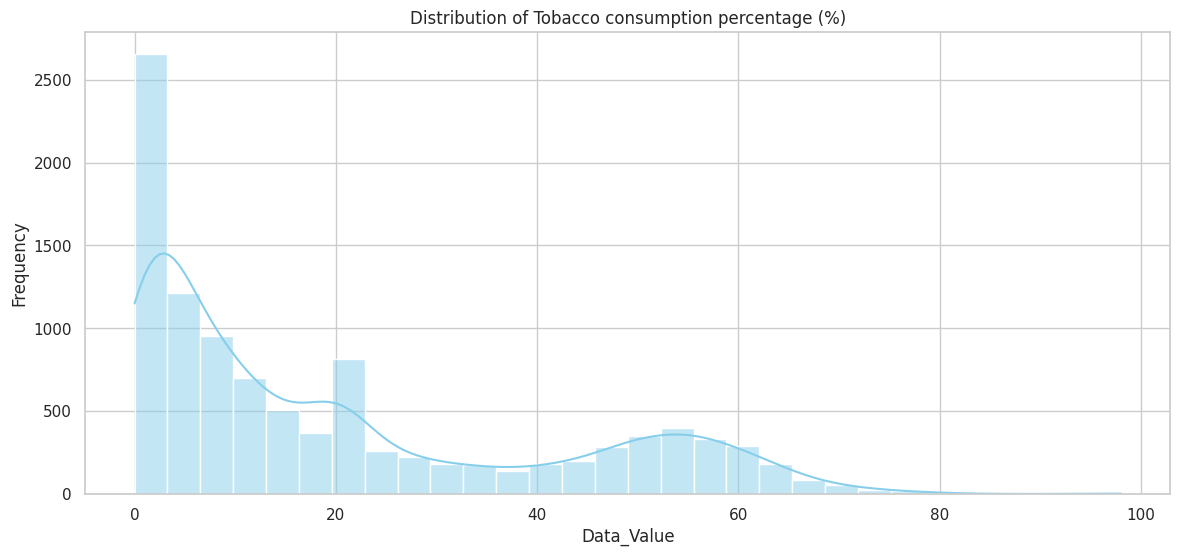

In [ ]:
# Plot 1: Distribution of 'Data_Value'
plt.figure(figsize=(14,6))
sns.histplot(df['Tobacco consumption percentage (%)'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of Tobacco consumption percentage (%)')
plt.xlabel('Data_Value')
plt.ylabel('Frequency')
plt.show()



*   It appears the data points are centered around 20, with a tail extending towards higher values. This suggests that a higher proportion of the data falls around 20% consumption rate and there are fewer instances of very high or very low consumption rates.

<ipython-input-15-6107bc78ab47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


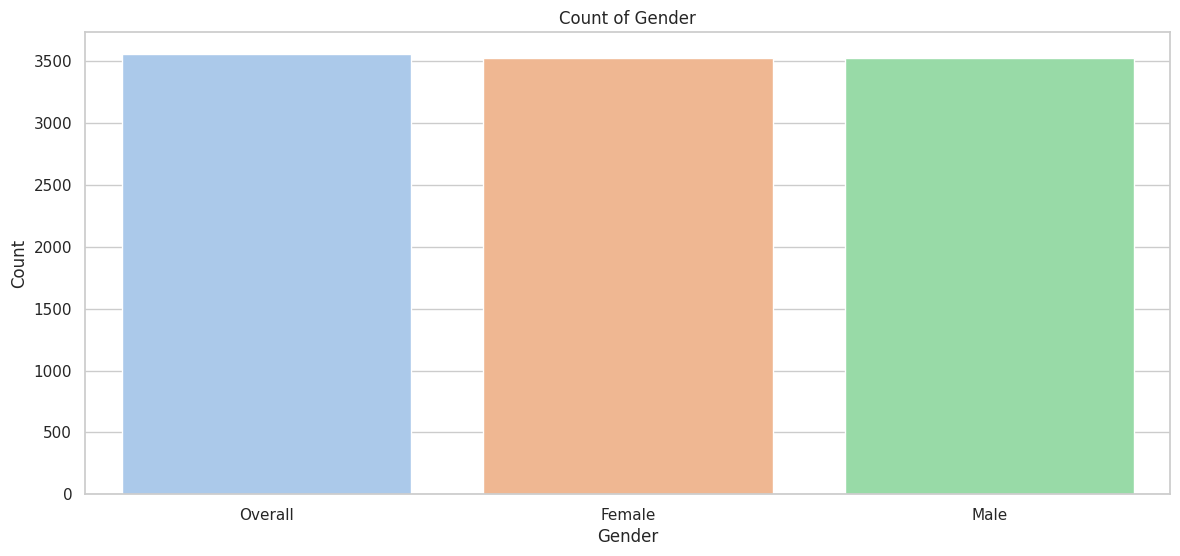

In [ ]:
# Plot 2: Countplot of 'Gender'
plt.figure(figsize=(14,6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

*   There might be a connection between gender and tobacco consumption. The countplot (Plot 2) suggests more females than males, while the histogram (Plot 1) shows a distribution centered around 20% consumption.


<ipython-input-16-8350a093f6aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Race', data=df, palette='muted')


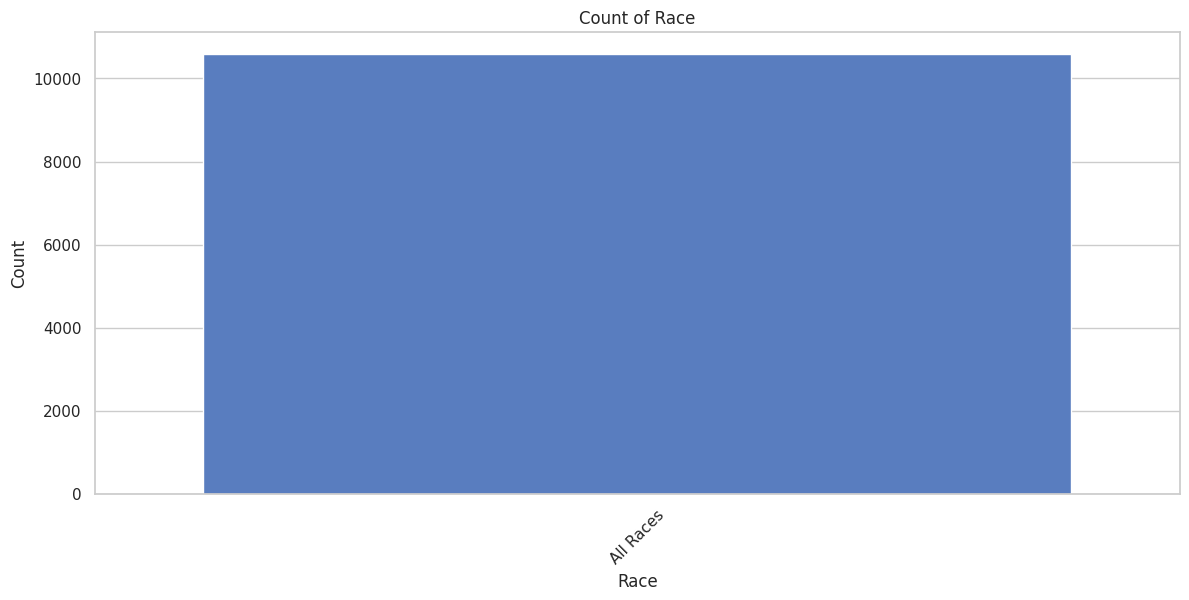

In [ ]:
# Plot 3: Countplot of 'Race'
plt.figure(figsize=(14,6))
sns.countplot(x='Race', data=df, palette='muted')
plt.title('Count of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-ba9ae79c4e46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='pastel')


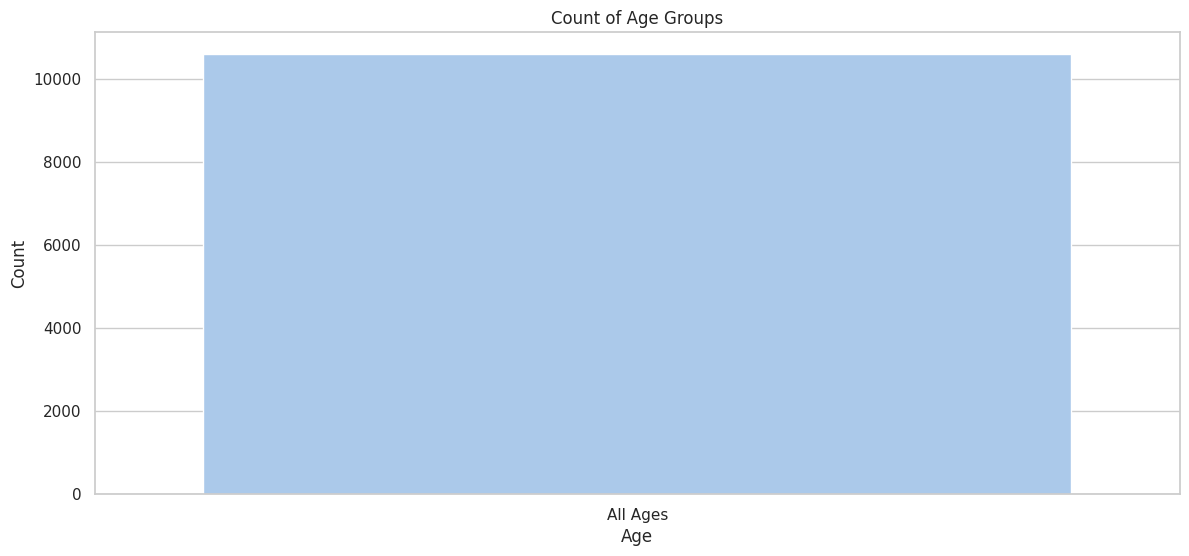

In [ ]:
# Plot 4: Countplot of 'Age'
plt.figure(figsize=(14,6))
sns.countplot(x='Age', data=df, palette='pastel')
plt.title('Count of Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

*   The plot shows a clear distribution of people across various age groups.

*   It appears that one or two age groups have a higher count compared to others, but it's impossible to determine which ones without the bin labels.


<ipython-input-18-1056910e6dae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='muted')


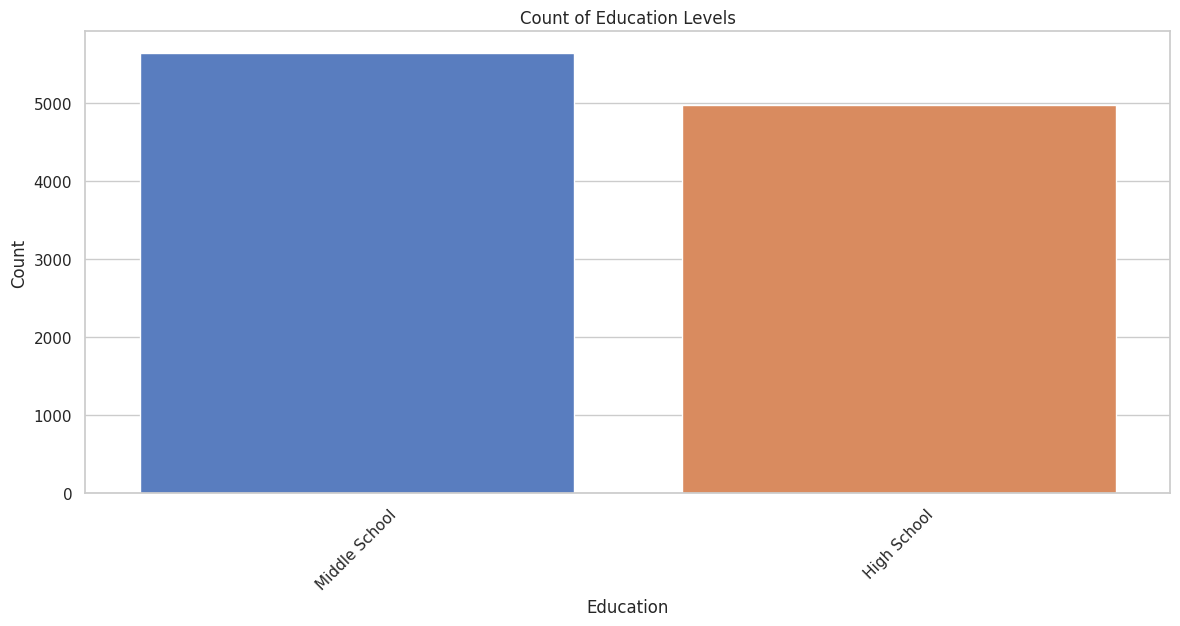

In [ ]:
# Plot 5: Countplot of 'Education'
plt.figure(figsize=(14,6))
sns.countplot(x='Education', data=df, palette='muted')
plt.title('Count of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*   The plot shows that there are more people with a middle school education compared to those with high school or other education levels.

<ipython-input-19-7db0d51ec071>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TopicDesc', data=df, palette='pastel')


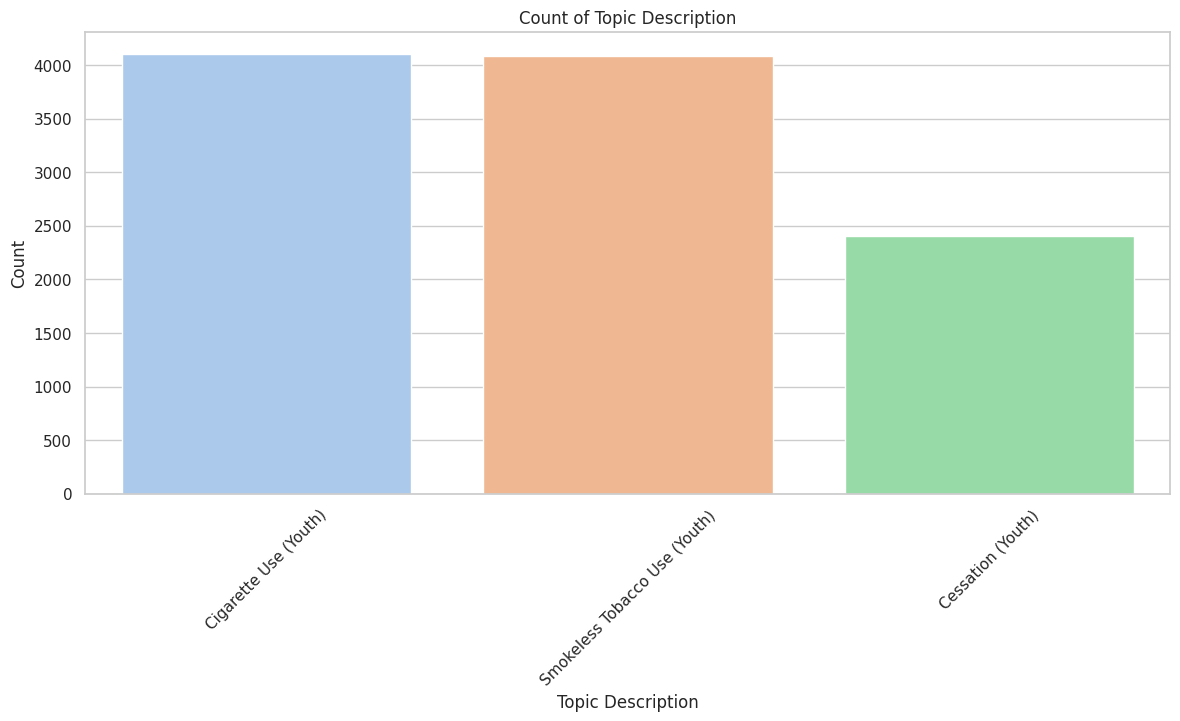

In [ ]:
# Plot 6: Countplot of 'TopicDesc'
plt.figure(figsize=(14, 6))
sns.countplot(x='TopicDesc', data=df, palette='pastel')
plt.title('Count of Topic Description')
plt.xlabel('Topic Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*   The topic description "Cigarette Use (Youth)" has the most documents in the dataset.
*   "Smokeless Tobacco Use (Youth)" and "Cessation (Youth)" have substantially fewer documents compared to "Cigarette Use (Youth)".

<ipython-input-20-10fc07d068ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette='muted')


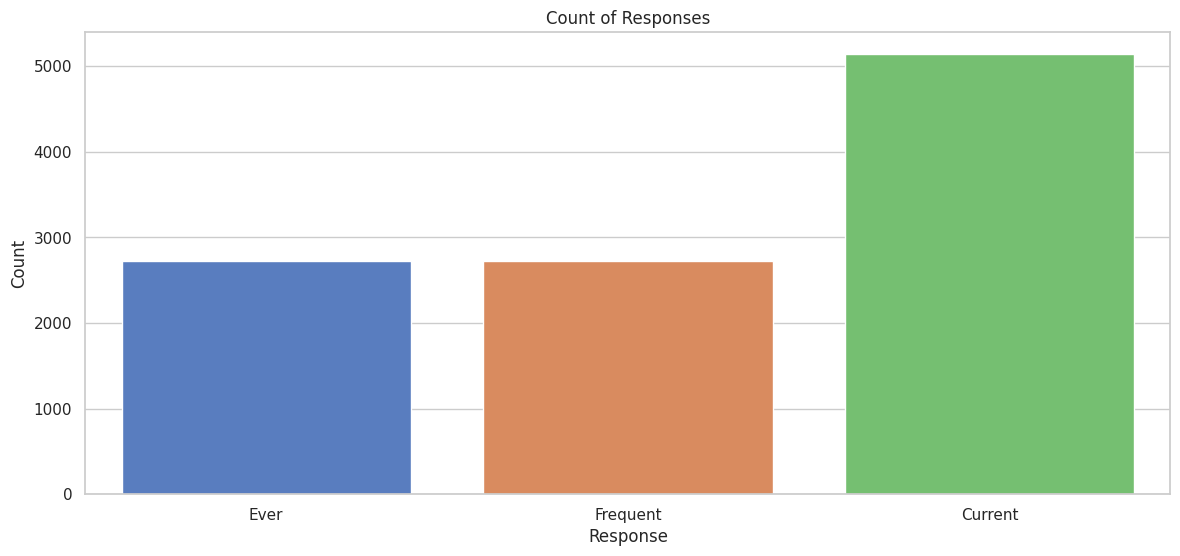

In [ ]:
# Plot 7: Countplot of 'Response'
plt.figure(figsize=(14,6))
sns.countplot(x='Response', data=df, palette='muted')
plt.title('Count of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

*  The most frequent response type is "Never". This suggests that a majority of the people did not engage in the behavior being measured by the responses.
*  There are fewer responses in the "Ever", "Frequent", and "Current" categories compared to "Never".

<ipython-input-21-ef82607143b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='StratificationID1', data=df, palette='pastel')


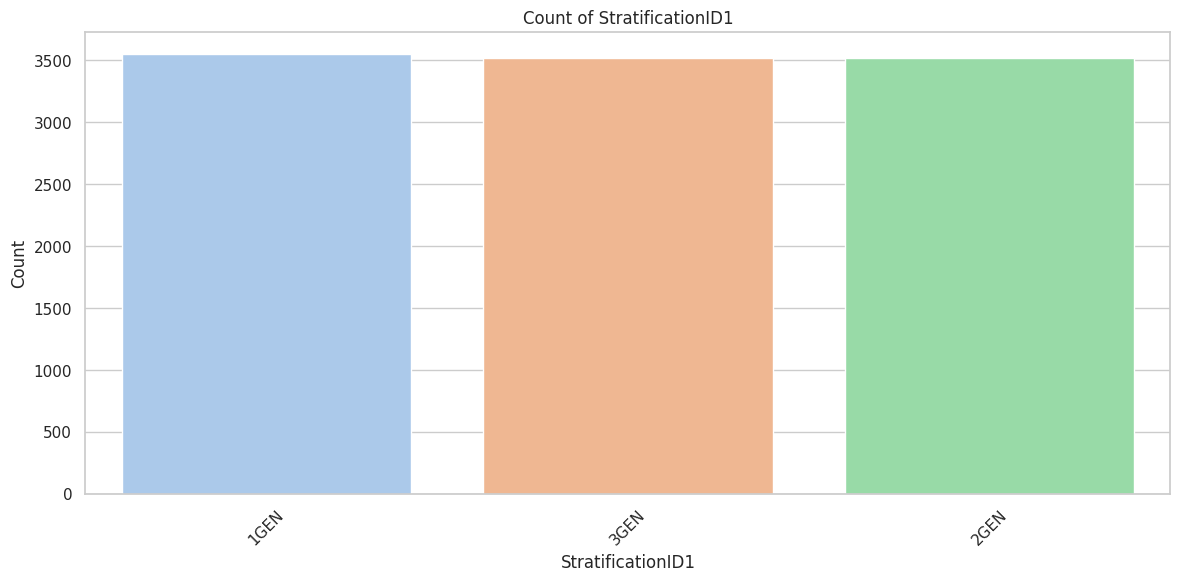

In [ ]:
# Plot 9: Countplot of 'StratificationID1'
plt.figure(figsize=(14,6))
sns.countplot(x='StratificationID1', data=df, palette='pastel')
plt.title('Count of StratificationID1')
plt.xlabel('StratificationID1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*   The StratificationID1 category "3GEN" has the most entries in the dataset.
"1GEN" and "2GEN" have substantially fewer entries compared to "3GEN".

<ipython-input-22-8271029de1f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='StratificationID3', data=df, palette='pastel')


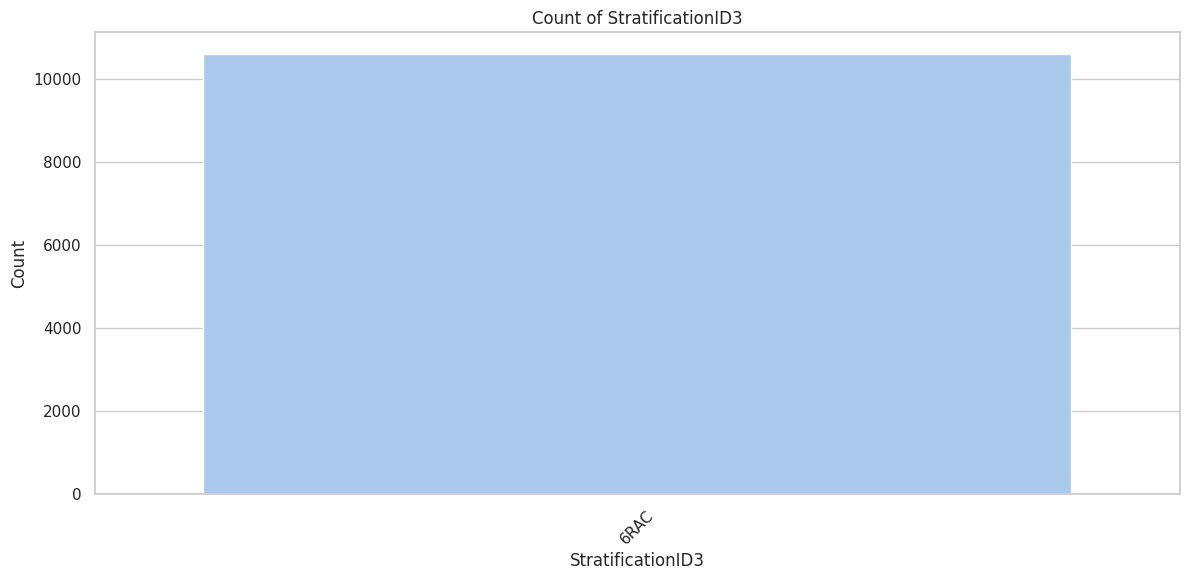

In [ ]:
# Plot 10: Countplot of 'StratificationID3'
plt.figure(figsize=(14,6))
sns.countplot(x='StratificationID3', data=df, palette='pastel')
plt.title('Count of StratificationID3')
plt.xlabel('StratificationID3')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*   There are more entries in the category "6RAC" compared to all other categories.
The category "5NAC" has the second highest count.
*   The remaining categories all have a significantly lower count compared to "6RAC" and "5NAC".

<ipython-input-23-814b191a9e20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='StratificationID4', data=df, palette='muted')


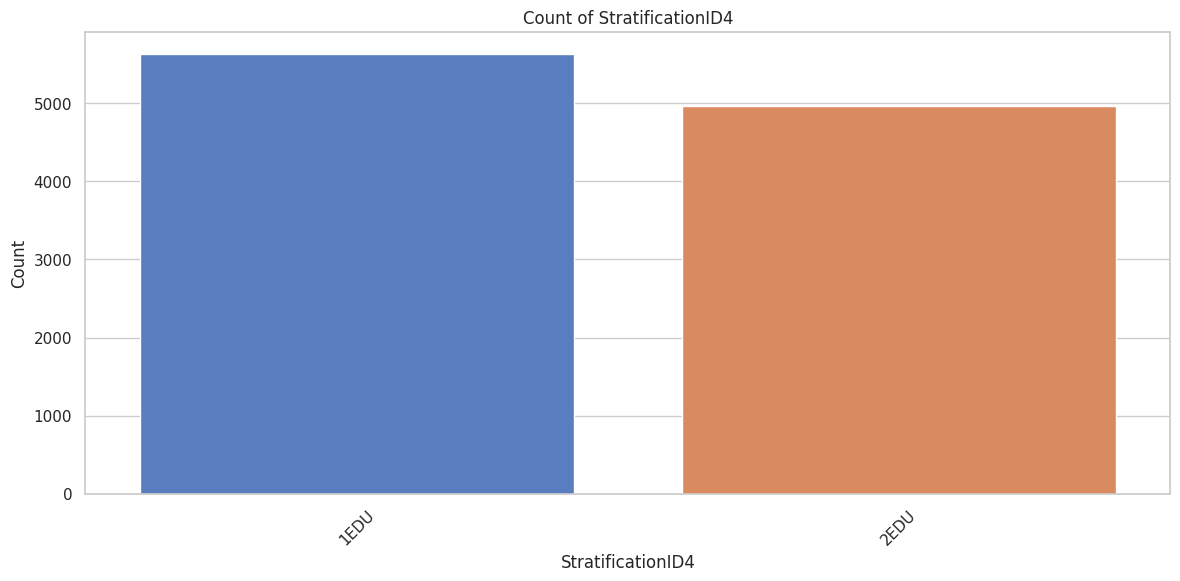

In [ ]:
# Plot 11: Countplot of 'StratificationID4'
plt.figure(figsize=(14,6))
sns.countplot(x='StratificationID4', data=df, palette='muted')
plt.title('Count of StratificationID4')
plt.xlabel('StratificationID4')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*   The most frequent StratificationID4 category is "Low-income". This is followed by "Middle-income" and "High-income". There appears to be a pattern with a decreasing number of entries as the income level goes from low to high.


<ipython-input-24-94e110aed0a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SubMeasureID', data=df, palette='pastel')


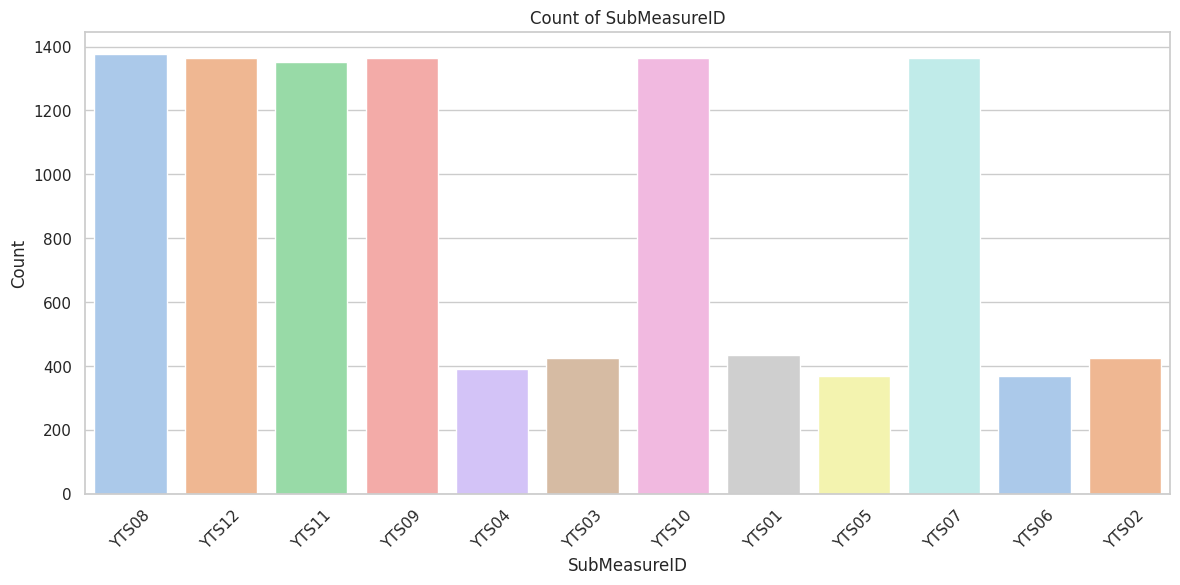

In [ ]:
# Plot 13: Countplot of 'SubMeasureID'
plt.figure(figsize=(14,6))
sns.countplot(x='SubMeasureID', data=df, palette='pastel')
plt.title('Count of SubMeasureID')
plt.xlabel('SubMeasureID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*   The SubMeasureID category "YTS08" has the most entries in the dataset.
There are several categories with a much lower count compared to "YTS08", including "YTS01", "YTS02", "YTS05", "YTS06", and "YTS07".


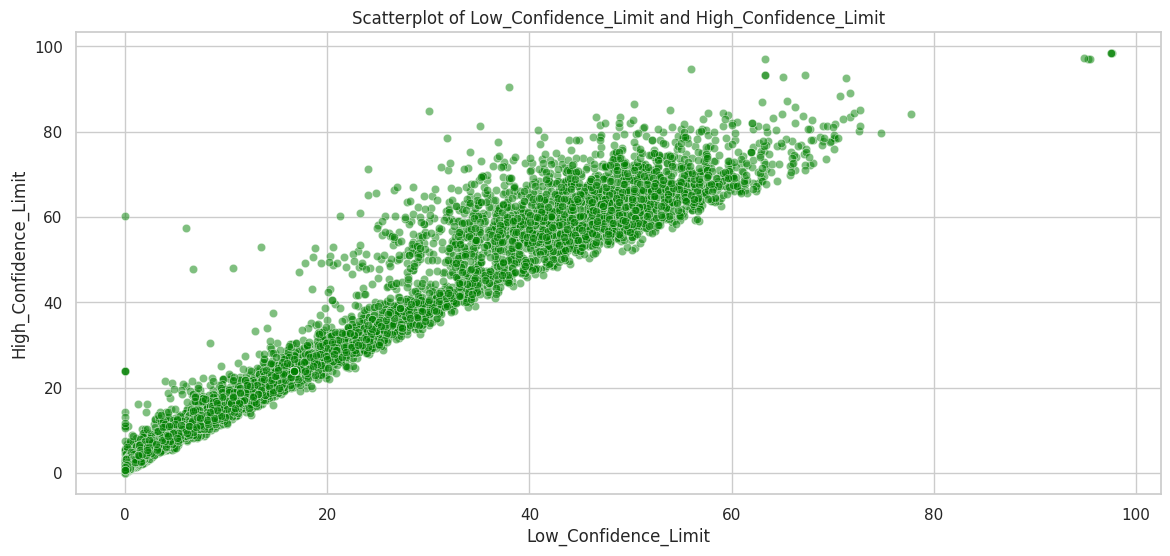

In [ ]:
# Plot 14: Scatterplot of 'Low_Confidence_Limit' and 'High_Confidence_Limit'
plt.figure(figsize=(14,6))
sns.scatterplot(x='Low_Confidence_Limit', y='High_Confidence_Limit', data=df, color='green', alpha=0.5)
plt.title('Scatterplot of Low_Confidence_Limit and High_Confidence_Limit')
plt.xlabel('Low_Confidence_Limit')
plt.ylabel('High_Confidence_Limit')
plt.show()

*   In general, the confidence limits appear to be clustered around a diagonal line, which suggests a positive correlation between the two variables. This means that when the lower confidence limit is high, the higher confidence limit also tends to be high, and vice versa.


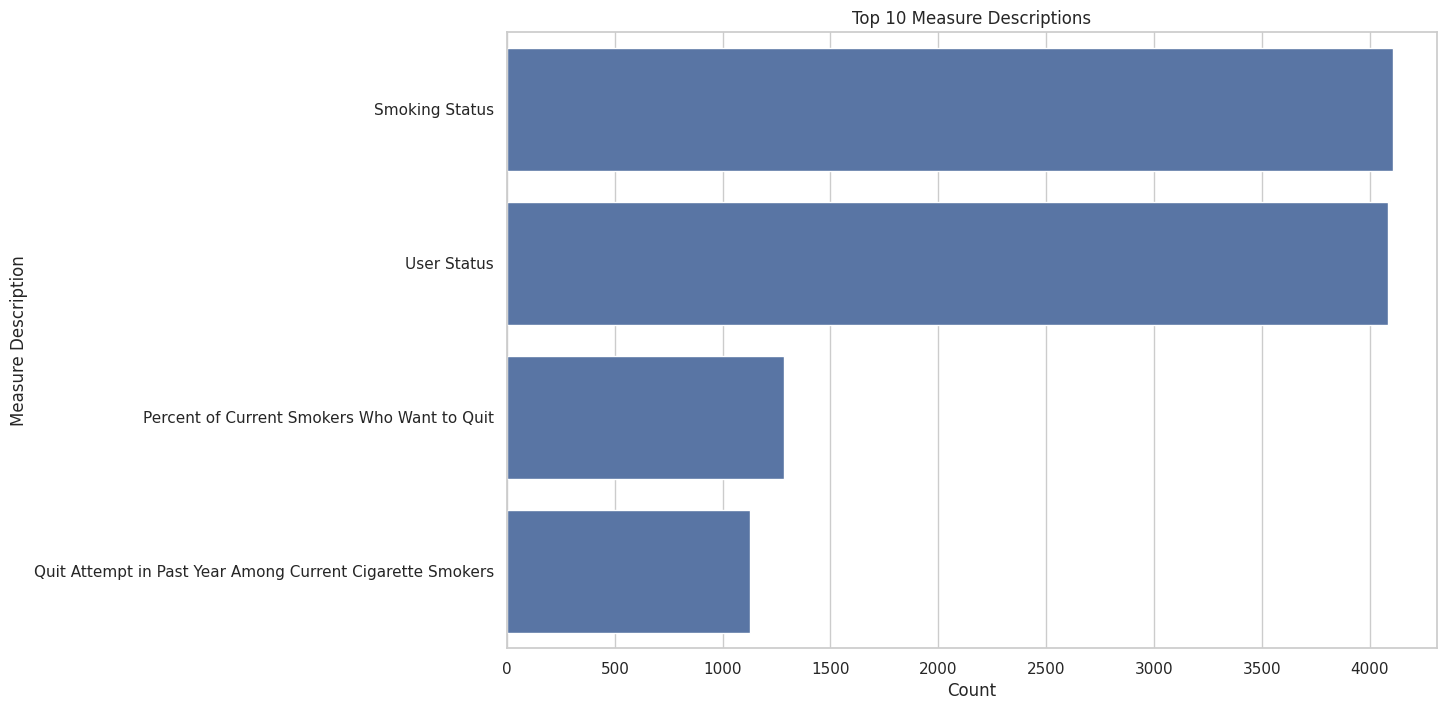

In [ ]:
#plot 15: Set the style of seaborn
sns.set(style="whitegrid")
# Define the figure and axis
plt.figure(figsize=(12, 8))
# Plot the countplot
sns.countplot(y='MeasureDesc', data=df, order=df['MeasureDesc'].value_counts().iloc[:10].index)
# Set the title and labels
plt.title('Top 10 Measure Descriptions')
plt.xlabel('Count')
plt.ylabel('Measure Description')
# Show the plot
plt.show()



*   The most frequent measure description is "Percent of Current Smokers Who Want to Quit". This suggests that smoking cessation might be a major focus of the data collection.
*   Other frequent descriptions include smoking status, quit attempts in the past year, and secondhand smoke exposure. This suggests the data might be related to smoking and tobacco use.

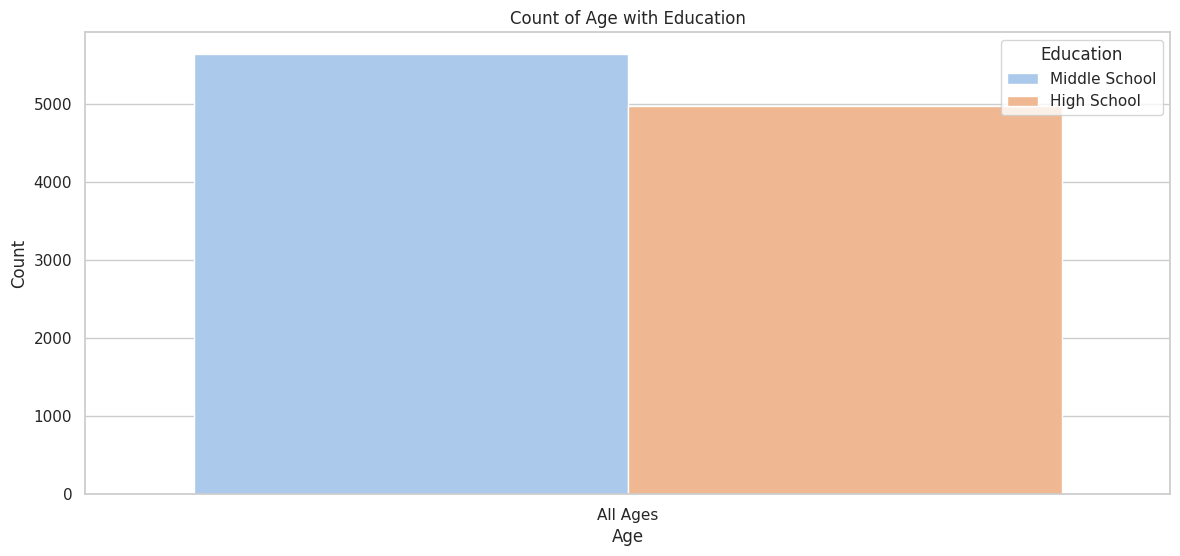

In [ ]:
# Plot 17: Countplot of 'Age' with hue='Education'
plt.figure(figsize=(14, 6))
sns.countplot(x='Age', data=df, hue='Education', palette='pastel')
plt.title('Count of Age with Education')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


*   Age Distribution: It appears that the data might have a higher concentration of younger people (possibly teens or young adults) since the left side of the x-axis seems to have higher counts. However, without knowing the age group labels, it's difficult to say for sure.
*   Education Breakdown: Within each age group, there seems to be a higher count of people with a middle school education compared to those with high school or other education levels.

<ipython-input-28-3db8ca0207bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tobacco consumption percentage (%)', data=df, palette='pastel')


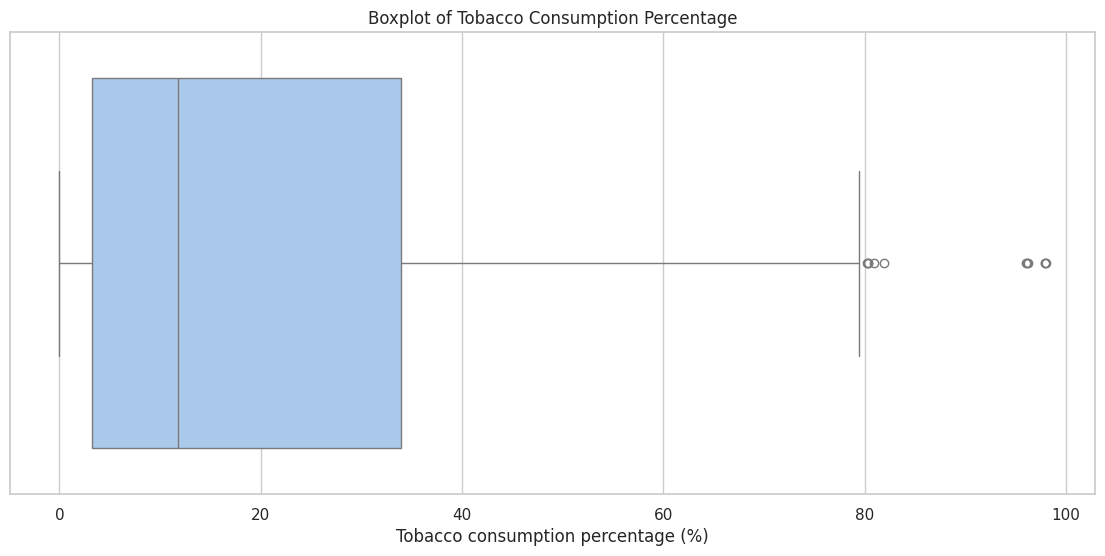

In [ ]:
# Plot 18: Boxplot of 'Tobacco consumption percentage (%)'
plt.figure(figsize=(14, 6))
sns.boxplot(x='Tobacco consumption percentage (%)', data=df, palette='pastel')
plt.title('Boxplot of Tobacco Consumption Percentage')
plt.xlabel('Tobacco consumption percentage (%)')
plt.show()

*   Center of Distribution: The boxplot shows that the center of the distribution of tobacco consumption percentage is around 20%. This means that a higher proportion of the data falls around this value, indicating that most people in the dataset have a tobacco consumption percentage close to 20%.
*   Spread of the Data: The box extends from approximately 0% to 40%, with outliers extending beyond these whiskers. This suggests that while a majority of the data falls around 20%, there is also a range of tobacco consumption percentages in the data, with some people having a much higher or lower consumption rate.

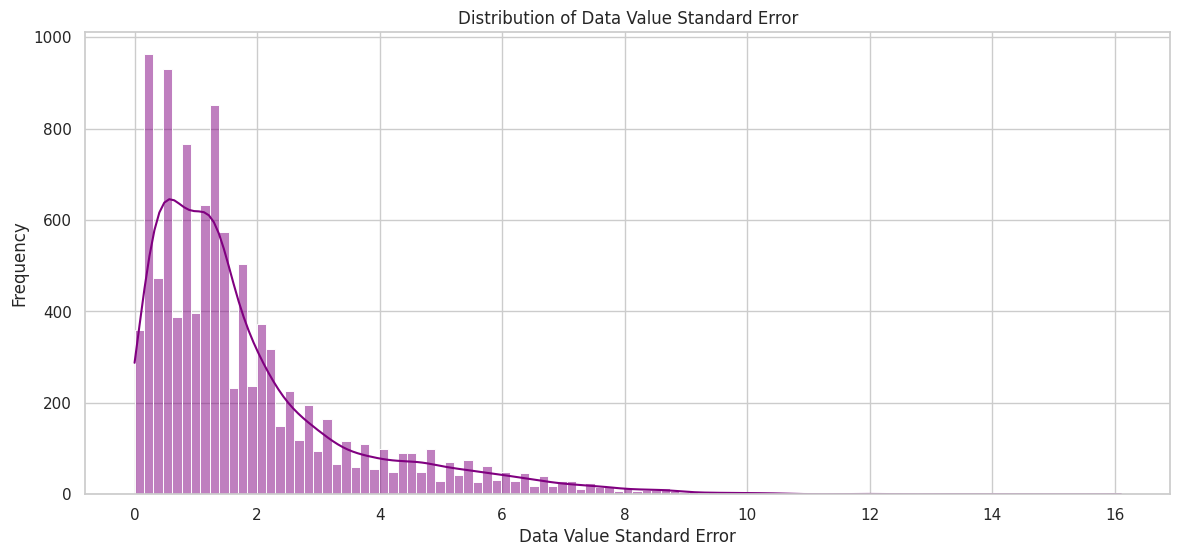

In [ ]:
# Plot 19: Histogram of 'Data_Value_Std_Err'
plt.figure(figsize=(14, 6))
sns.histplot(df['Data_Value_Std_Err'], kde=True, color='purple')
plt.title('Distribution of Data Value Standard Error')
plt.xlabel('Data Value Standard Error')
plt.ylabel('Frequency')
plt.show()

*   Distribution: The distribution of the data value standard error appears to be centered around a value close to zero, and the curve follows a bell-shaped pattern, which suggests a normal distribution. This indicates that most of the data points have a standard error close to the average.
*   Spread of the Data: The data points are spread out on either side of the center, with a longer tail extending towards the positive side. This suggests that there might be more data points with a slightly higher standard error compared to those with a negative standard error. However, the overall spread seems relatively small.

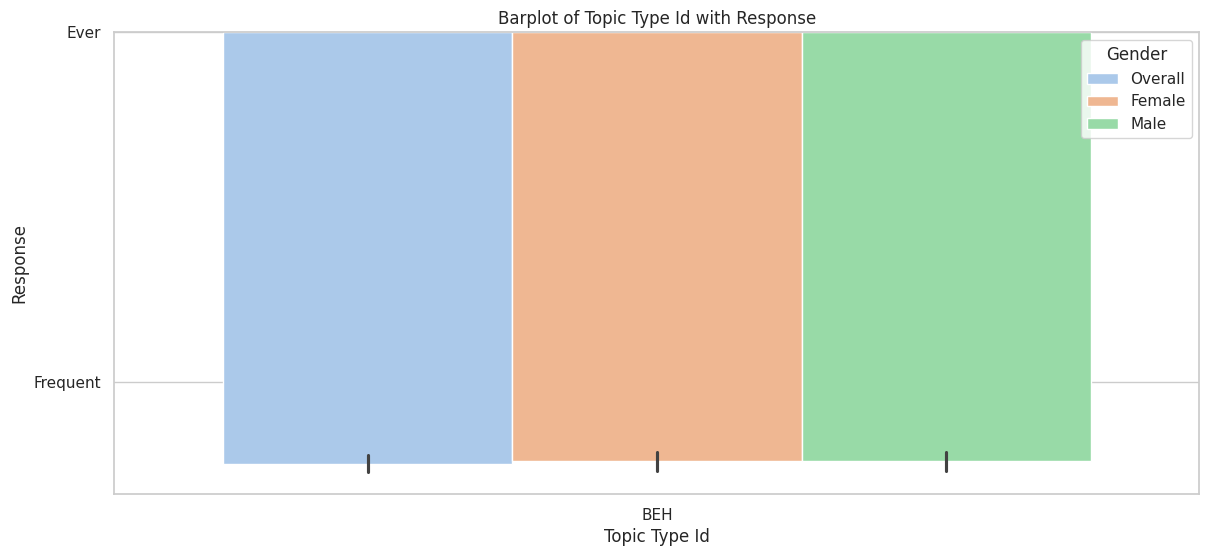

In [ ]:
# Plot 20: Barplot of 'TopicTypeId' with hue='Response'
plt.figure(figsize=(14, 6))
sns.barplot(x='TopicTypeId', y='Response', data=df, hue='Gender', palette='pastel')
plt.title('Barplot of Topic Type Id with Response')
plt.xlabel('Topic Type Id')
plt.ylabel('Response')
plt.show()

*   Response Distribution by Topic Type: The plot shows how the distribution of responses (Never, Ever, Frequent, Current) varies across different topic types. For example, we can see if a particular topic type has a higher proportion of people responding "Never" compared to other topic types.
*   Gender Breakdown: Within each topic type, the colors of the bars show the breakdown of responses by gender. This allows us to compare how males and females respond to the same topic type. For instance, we can see if there's a topic type where a higher proportion of females respond "Ever" compared to males.


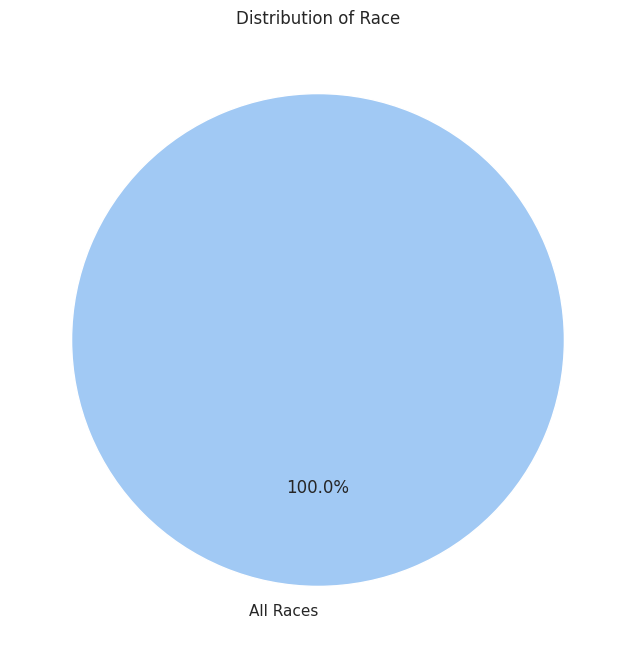

In [ ]:
# Plot 21: Pie chart of 'Race'
plt.figure(figsize=(8, 8))
df['Race'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Distribution of Race')
plt.ylabel('')
plt.show()

<ipython-input-32-8c84c58b361a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age', y='Tobacco consumption percentage (%)', data=df, palette='pastel')


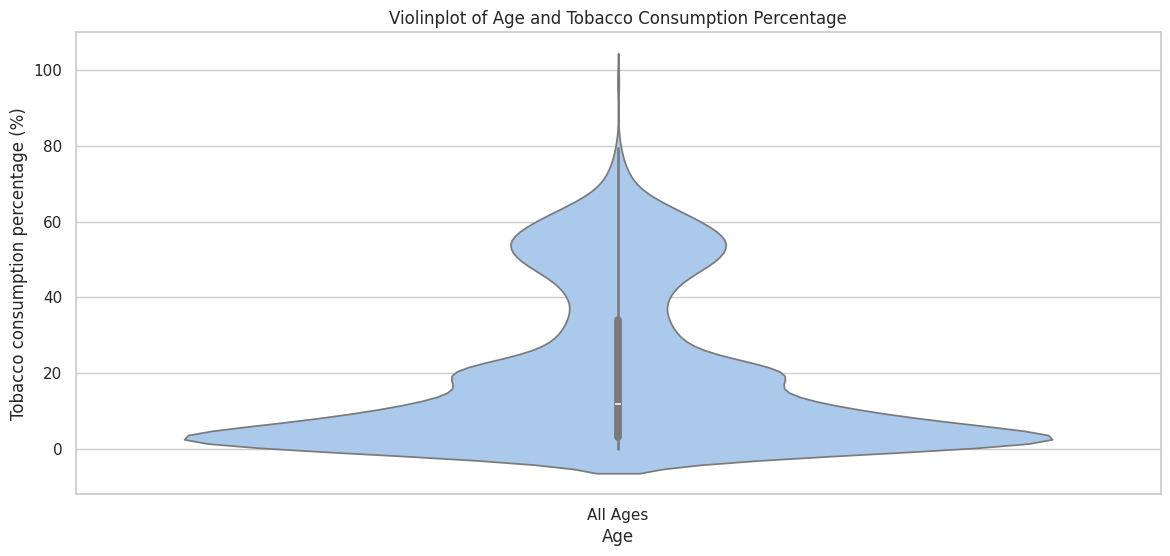

In [ ]:
# Plot 22: Violinplot of 'Age' and 'Tobacco consumption percentage (%)'
plt.figure(figsize=(14, 6))
sns.violinplot(x='Age', y='Tobacco consumption percentage (%)', data=df, palette='pastel')
plt.title('Violinplot of Age and Tobacco Consumption Percentage')
plt.xlabel('Age')
plt.ylabel('Tobacco consumption percentage (%)')
plt.show()

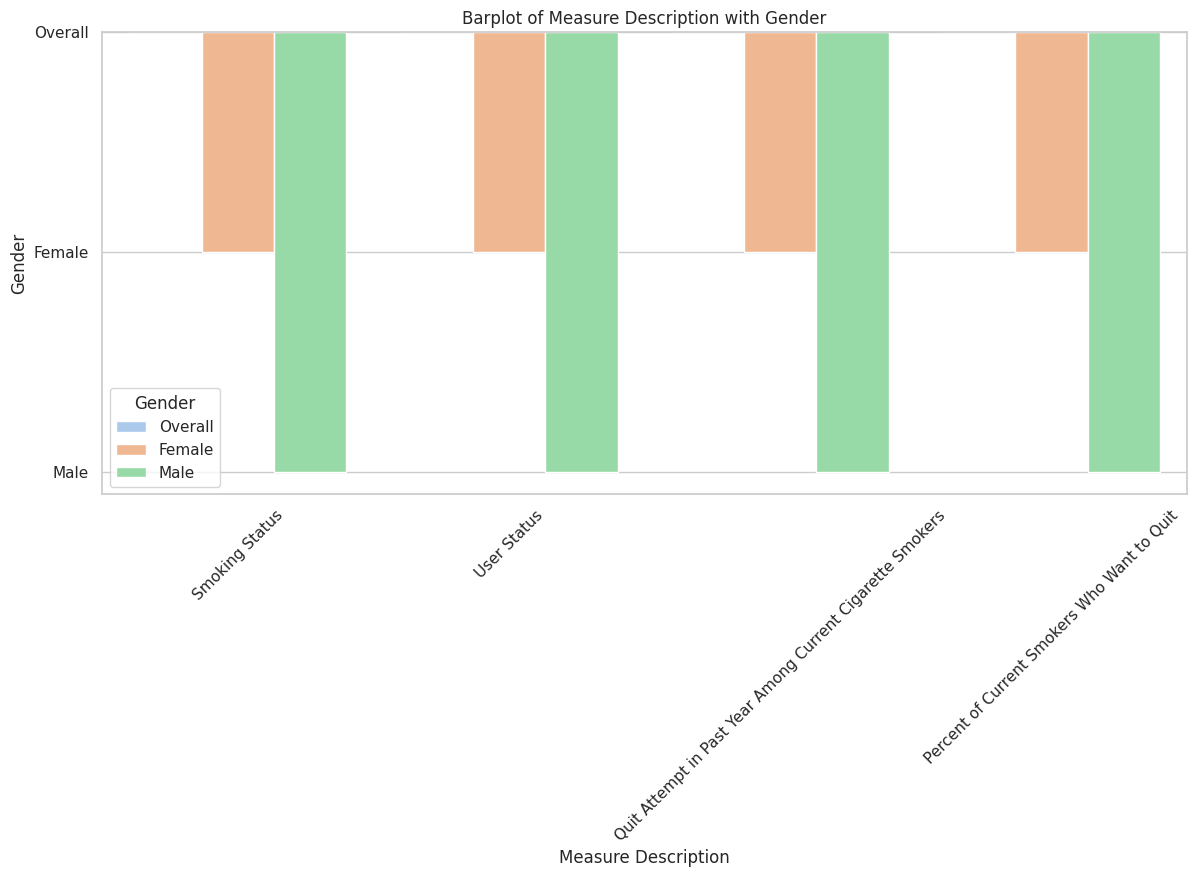

In [ ]:
# Plot 23: Barplot of 'MeasureDesc' with hue='Gender'
plt.figure(figsize=(14, 6))
sns.barplot(x='MeasureDesc', y='Gender', data=df, hue='Gender', palette='pastel')
plt.title('Barplot of Measure Description with Gender')
plt.xlabel('Measure Description')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

*   Measure Descriptions: The plot allows you to see which measure descriptions have a higher count of females compared to males, and vice versa. For instance, it might reveal that smoking cessation measures have a higher count of females than males.
*   Gender Distribution: We can see the overall distribution of genders across all measure descriptions. However, it's important to consider that the total number of people for each measure description might vary.

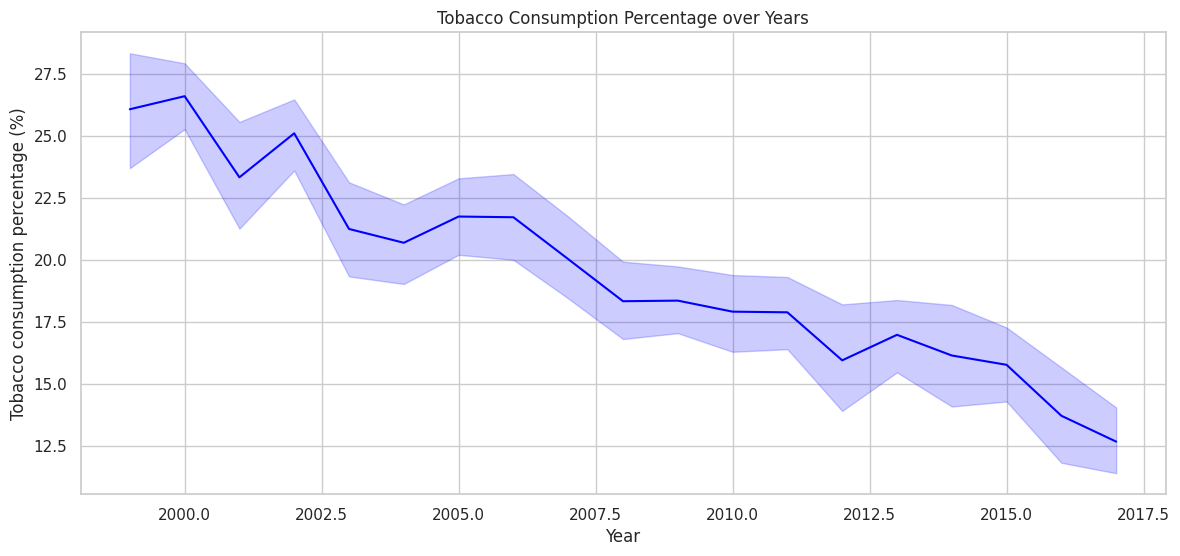

In [ ]:
# Plot 24: Line plot of 'YEAR' and 'Tobacco consumption percentage (%)'
plt.figure(figsize=(14, 6))
sns.lineplot(x='YEAR', y='Tobacco consumption percentage (%)', data=df, color='blue')
plt.title('Tobacco Consumption Percentage over Years')
plt.xlabel('Year')
plt.ylabel('Tobacco consumption percentage (%)')
plt.show()



*   Decreasing Trend: There appears to be a downward trend in tobacco consumption percentage over the years. This suggests that smoking prevalence might be declining over time in the population represented by this data.


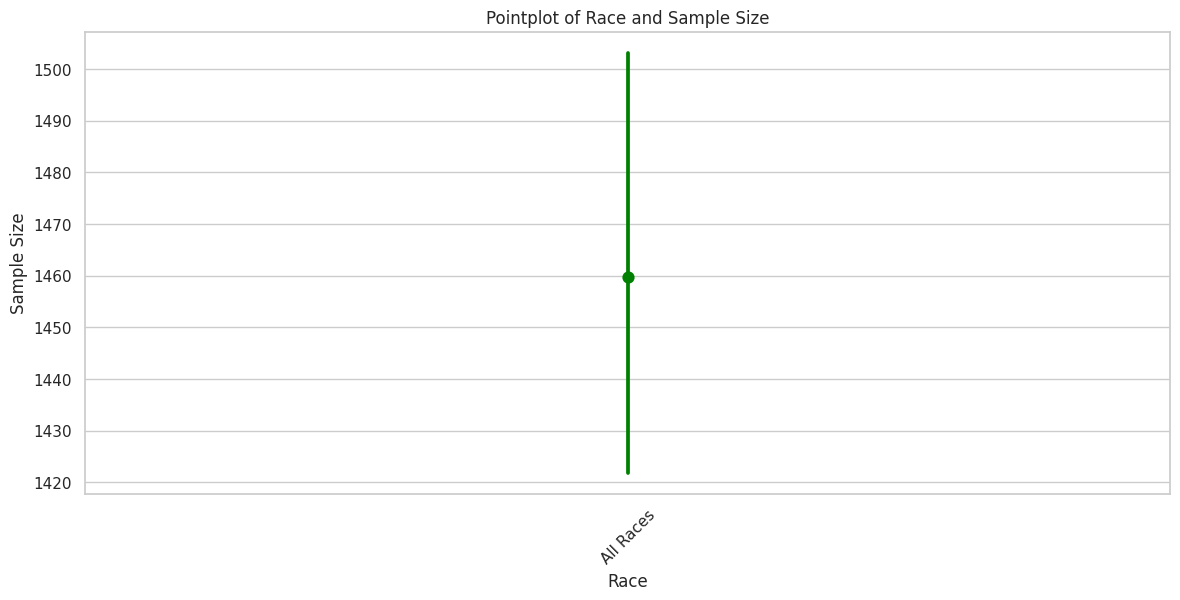

In [ ]:
# Plot 26: Point plot of 'Race' and 'Sample_Size'
plt.figure(figsize=(14, 6))
sns.pointplot(x='Race', y='Sample_Size', data=df, color='green')
plt.title('Pointplot of Race and Sample Size')
plt.xlabel('Race')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)
plt.show()

*   Sample Size Distribution by Race: The plot reveals any differences in sample size across racial categories. For instance, it might show that the "White" race has a larger average sample size compared to other races.
*   Variability in Sample Size: The vertical lines extending from the circles represent the standard deviation or spread of the sample size within each race.  A longer line indicates greater variability in sample size within that racial category.


<ipython-input-36-c4b42cd5c6cb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['High_Confidence_Limit'], shade=True, color='orange')


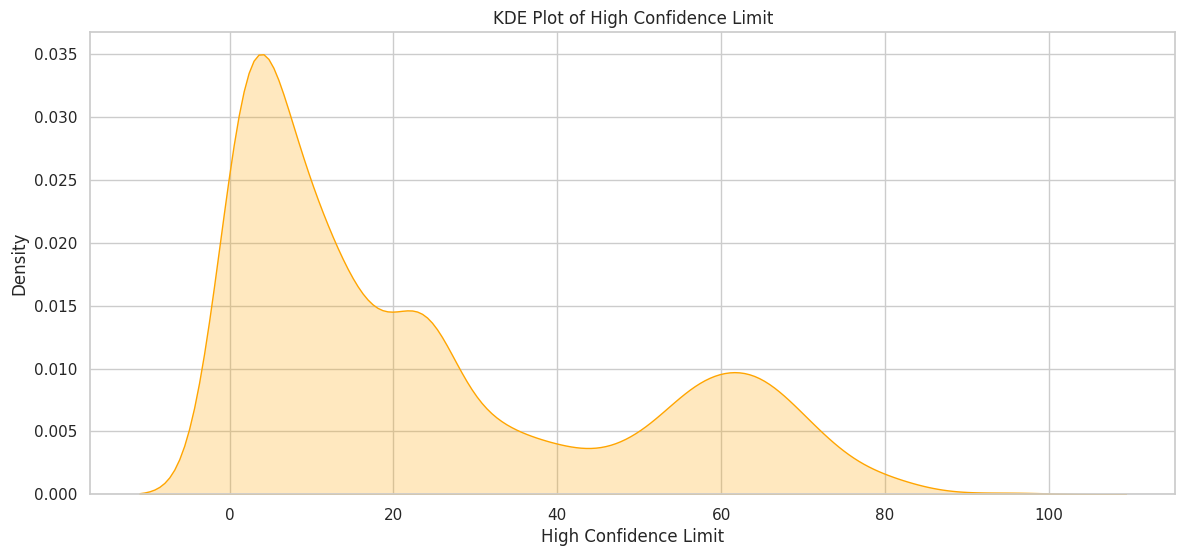

In [ ]:
# Plot 27: KDE plot of 'High_Confidence_Limit'
plt.figure(figsize=(14, 6))
sns.kdeplot(df['High_Confidence_Limit'], shade=True, color='orange')
plt.title('KDE Plot of High Confidence Limit')
plt.xlabel('High Confidence Limit')
plt.ylabel('Density')
plt.show()

*   Distribution of High Confidence Limits: The plot shows the probability density of the high confidence limits. The x-axis represents the values of the high confidence limit, and the y-axis represents the density. The higher the density at a particular point on the x-axis, the more data points there are in that range of high confidence limits.
*   Shape of the Distribution: The distribution appears to be somewhat symmetrical, but it's difficult to say for sure without knowing the scale on the x-axis.

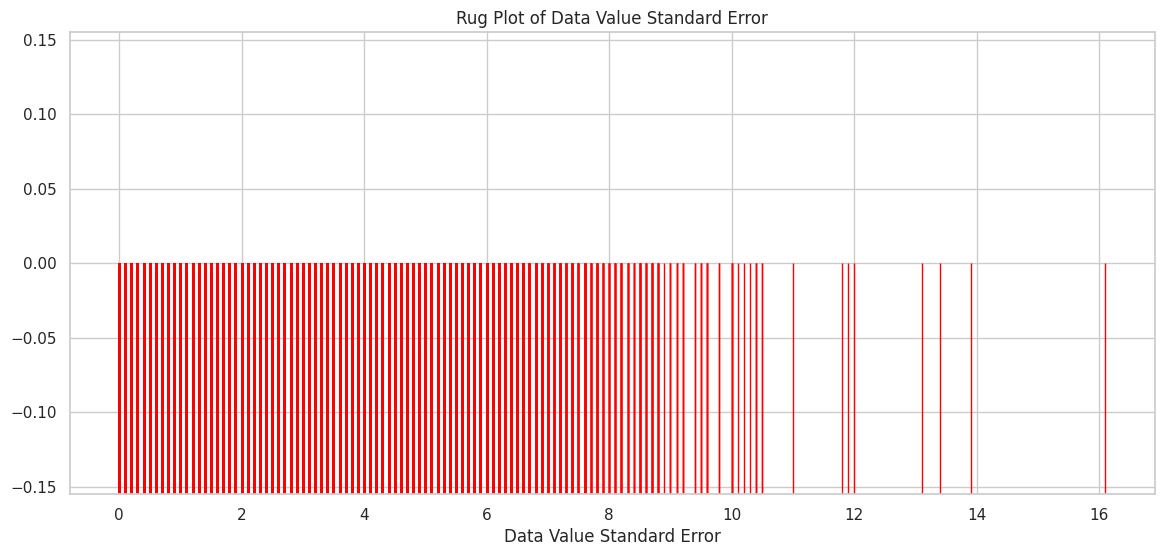

In [ ]:
# Plot 28: Rug plot of 'Data_Value_Std_Err'
plt.figure(figsize=(14, 6))
sns.rugplot(df['Data_Value_Std_Err'], height=0.5, color='red')
plt.title('Rug Plot of Data Value Standard Error')
plt.xlabel('Data Value Standard Error')
plt.show()

*   The rug plot provides a more detailed view of the distribution of the data value standard error compared to a histogram.  While a histogram summarizes the data into bins, the rug plot shows the location of every data point on the x-axis.
*   Spread of the Data: The rug plot shows that the data value standard error is spread out around a value close to zero, with some data points extending towards positive and negative values. This suggests that there is variability in how spread out the data points are around the average value in different subgroups or categories within the data.

<ipython-input-38-52588dbe7094>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Education', y='Tobacco consumption percentage (%)', data=df, palette='pastel')


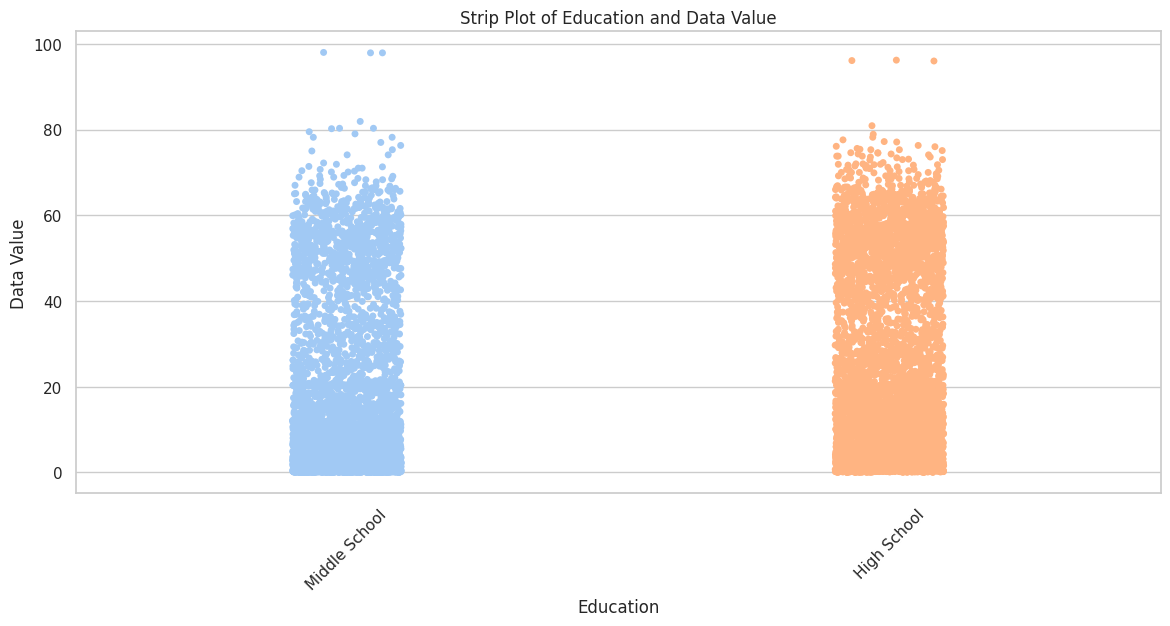

In [ ]:
# Plot 30: Strip plot of 'Education' and 'Data_Value'
plt.figure(figsize=(14, 6))
sns.stripplot(x='Education', y='Tobacco consumption percentage (%)', data=df, palette='pastel')
plt.title('Strip Plot of Education and Data Value')
plt.xlabel('Education')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.show()

*   Education and Tobacco Consumption: The strip plot suggests that there might be an inverse relationship between education level and tobacco consumption percentage. In general, the strips for people with higher education (high school or other) tend to be lower on the y-axis (indicating lower tobacco consumption percentage) compared to those with middle school education.
*   Variability Within Education Groups: Even within each education level, there is some variability in tobacco consumption percentage. The spread of the strips across the y-axis for each education level shows that there are people with high tobacco consumption even among those with higher education levels, and vice versa.

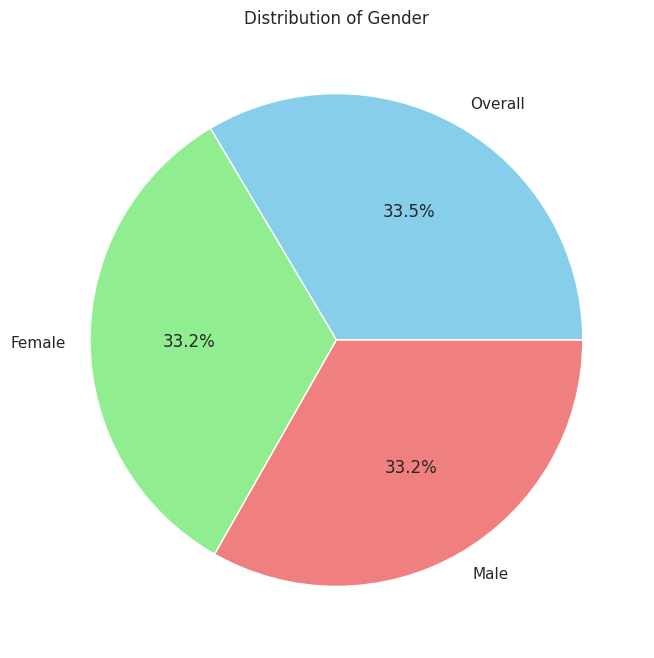

In [ ]:
# Plot 31: Pie chart of 'Gender' distribution
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()

*   The proportion of females (33.5%) is very similar to the proportion of males (33.2%). There doesn't appear to be a significant skew towards one gender or the other.
*   There is a small proportion of entries (around 3.3%) for which gender is not specified.

<ipython-input-40-8b9ec28d3d00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education', y='Tobacco consumption percentage (%)', data=df, palette='pastel')


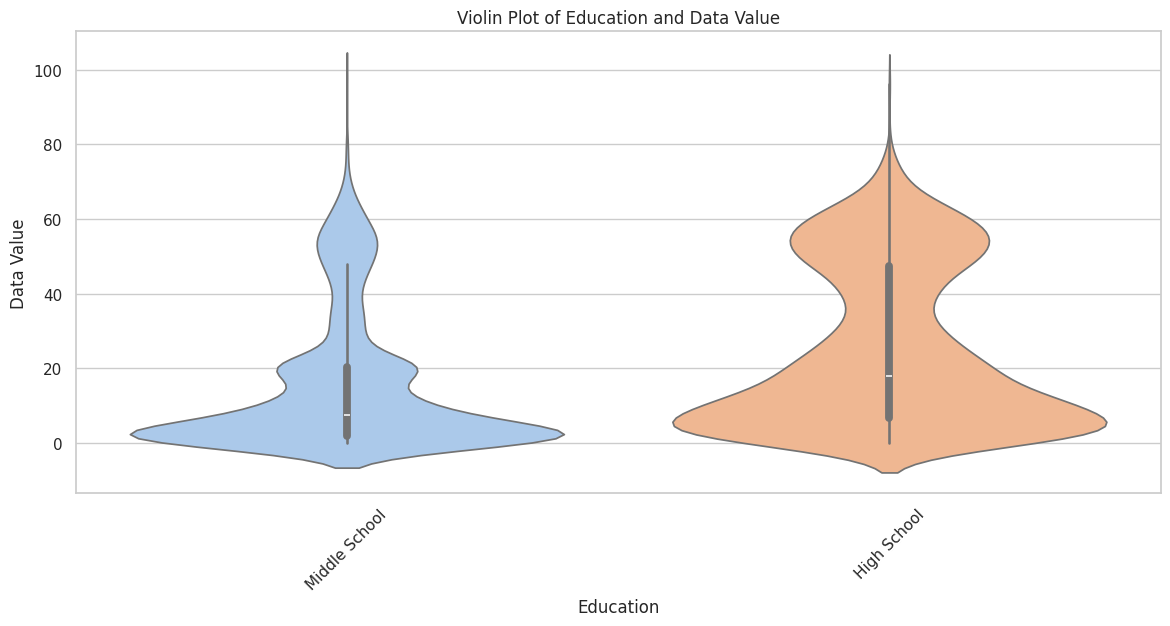

In [ ]:
# Plot 32: Violin plot of 'Education' and 'Data_Value'
plt.figure(figsize=(14, 6))
sns.violinplot(x='Education', y='Tobacco consumption percentage (%)', data=df, palette='pastel')
plt.title('Violin Plot of Education and Data Value')
plt.xlabel('Education')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.show()

*   Center of Distribution: The wider part of the violin at the center (around the quartiles) shows the concentration of data points for each education level in terms of tobacco consumption percentage. It appears that the center of the distribution for people with middle school education is slightly higher on the y-axis compared to the other two education levels. This suggests that people with middle school education might have a higher median tobacco consumption percentage.
*   Spread of the Data: The violin plot also shows the spread of the data for each education level with the tails extending above and below the wider center section. The tails indicate the range of tobacco consumption percentages within each education group. The spread of the data seems to be wider for middle school and "Other" education levels compared to high school. This suggests that there might be more variability in tobacco consumption percentage among people in these two education groups.

<ipython-input-41-c85a4ce1bfe4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Sample_Size', data=df, palette='pastel')


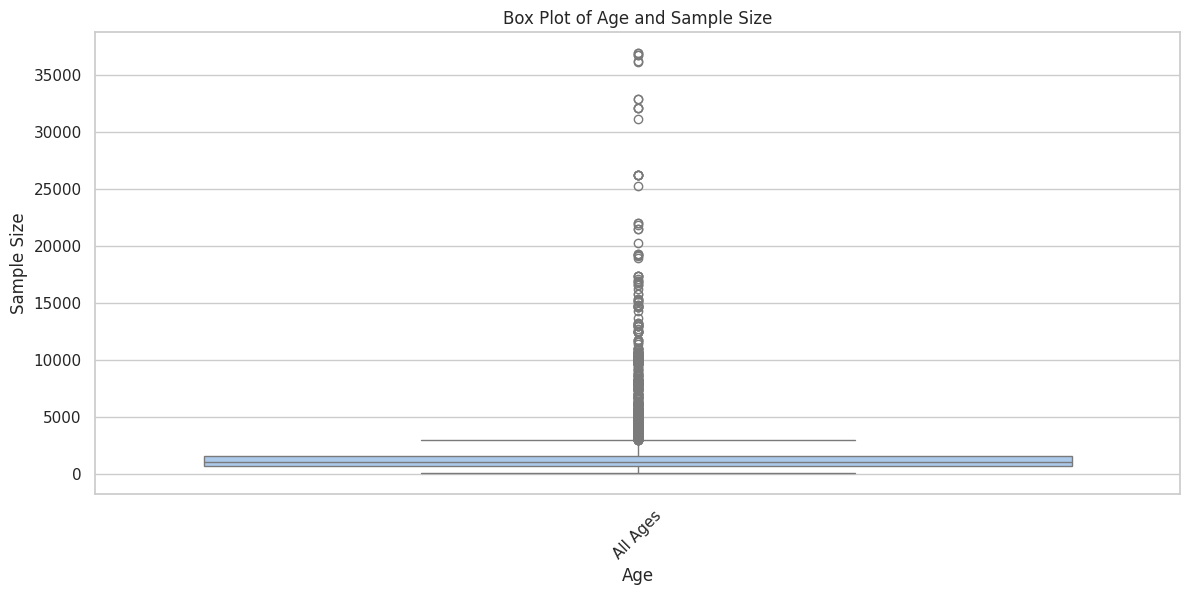

In [ ]:
# Plot 33: Box plot of 'Age' and 'Sample_Size'
plt.figure(figsize=(14, 6))
sns.boxplot(x='Age', y='Sample_Size', data=df, palette='pastel')
plt.title('Box Plot of Age and Sample Size')
plt.xlabel('Age')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)
plt.show()

*   Sample Size Distribution by Age: The boxplot reveals how the sample size is distributed across different age groups. For instance, it might show that there are more data points (larger sample size) for younger age groups compared to older adults.
*   Variability in Sample Size: The boxplot shows the spread of the sample size within each age group. The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with the median (Q2) represented by the line in the middle of the box. The whiskers extend from the quartiles to the most extreme data points that are not considered outliers. A longer whisker indicates greater variability in sample size within that age group.

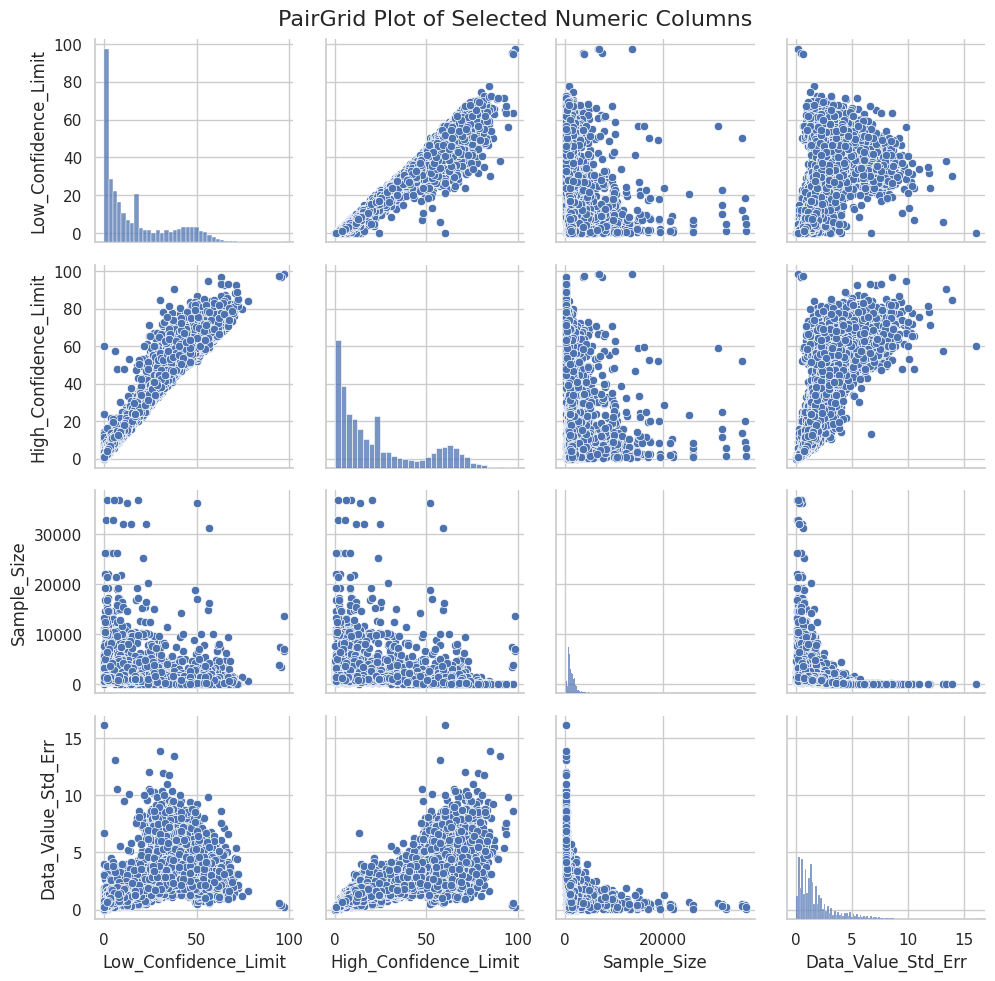

In [ ]:
# Plot 34: PairGrid plot of selected numeric columns
g = sns.PairGrid(df, vars=['Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'Data_Value_Std_Err'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('PairGrid Plot of Selected Numeric Columns', fontsize=16)
plt.show()

*   Relationships Between Variables: By looking at the scatterplots, we can see if there are any linear or nonlinear relationships between the pairs of variables. For example, the scatterplot between "Low_Confidence_Limit" and "High_Confidence_Limit" might show a positive correlation, indicating that higher lower confidence limits tend to be associated with higher upper confidence limits.
*   Distribution of Variables: The histograms along the diagonal plots show the distribution of each numeric variable in your data. For instance, the histogram for "Sample_Size" might show whether the data is skewed towards smaller or larger sample sizes.

<Figure size 1400x600 with 0 Axes>

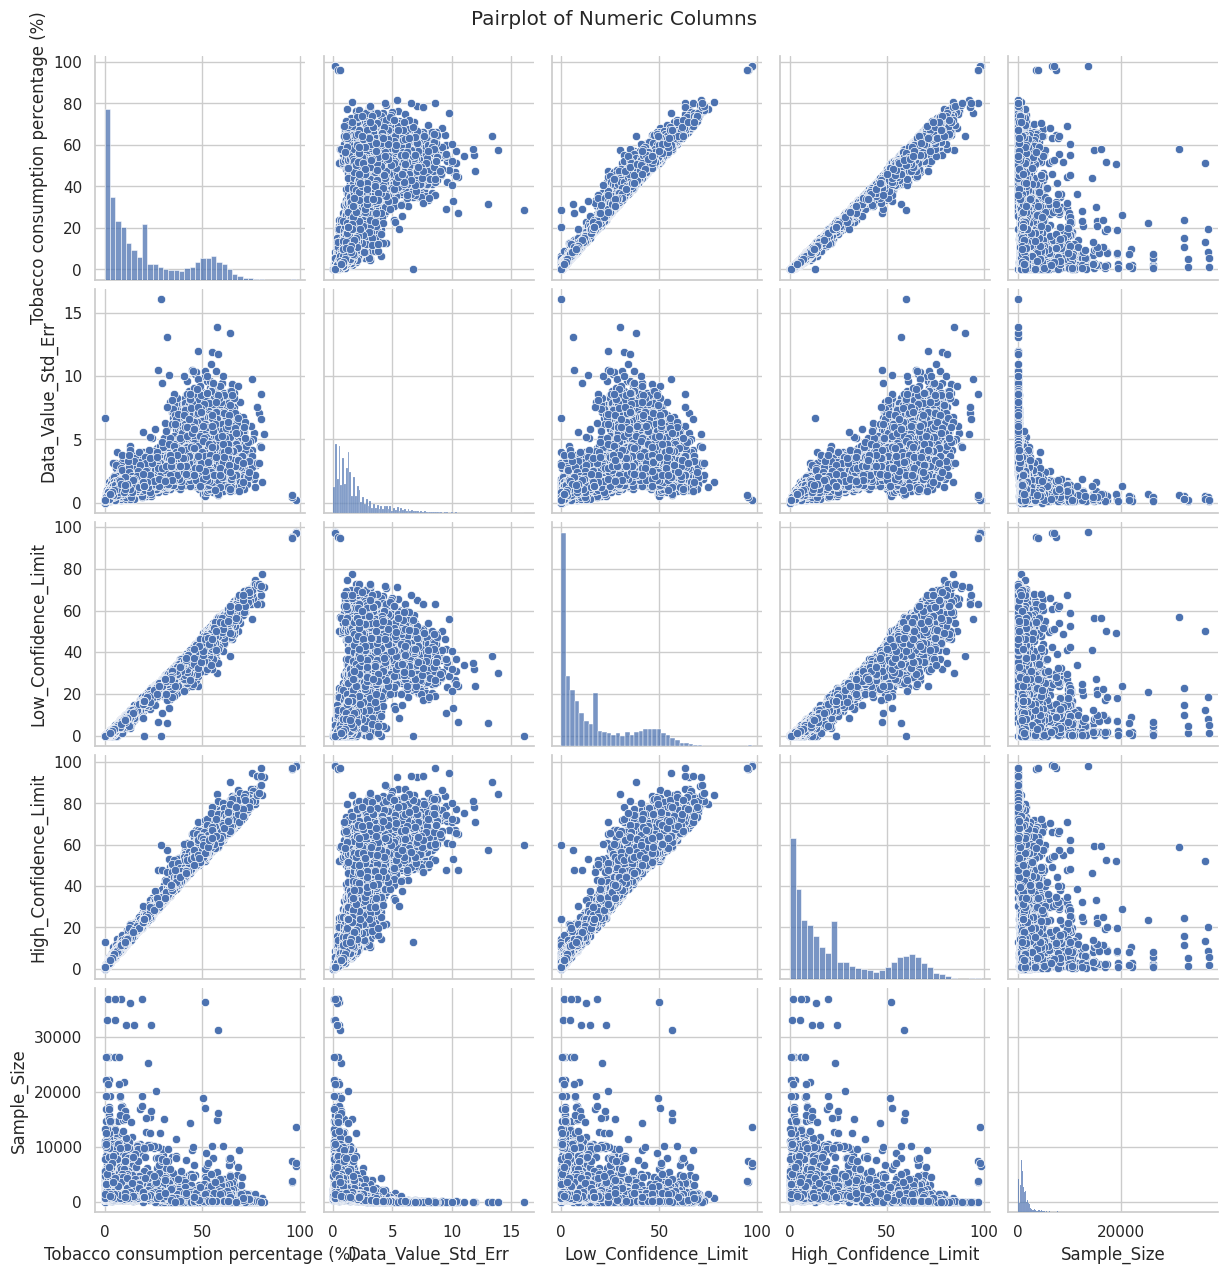

In [ ]:
# Plot 35: Pairplot of numeric columns
plt.figure(figsize=(14,6))
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_df = df[numeric_cols].dropna()
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

*   Relationships Between Variables: By looking at the scatterplots, we can see if there are any linear or nonlinear relationships between the pairs of variables. For example, the scatterplot between "Low_Confidence_Limit" and "High_Confidence_Limit" might show a positive correlation, indicating that higher lower confidence limits tend to be associated with higher upper confidence limits.
*   Distribution of Variables: The diagonal plots are histograms, which show the distribution of each individual numeric variable in your data. For instance, the histogram for "Sample_Size" might show whether the data is skewed towards smaller or larger sample sizes.


<Figure size 1400x1400 with 0 Axes>

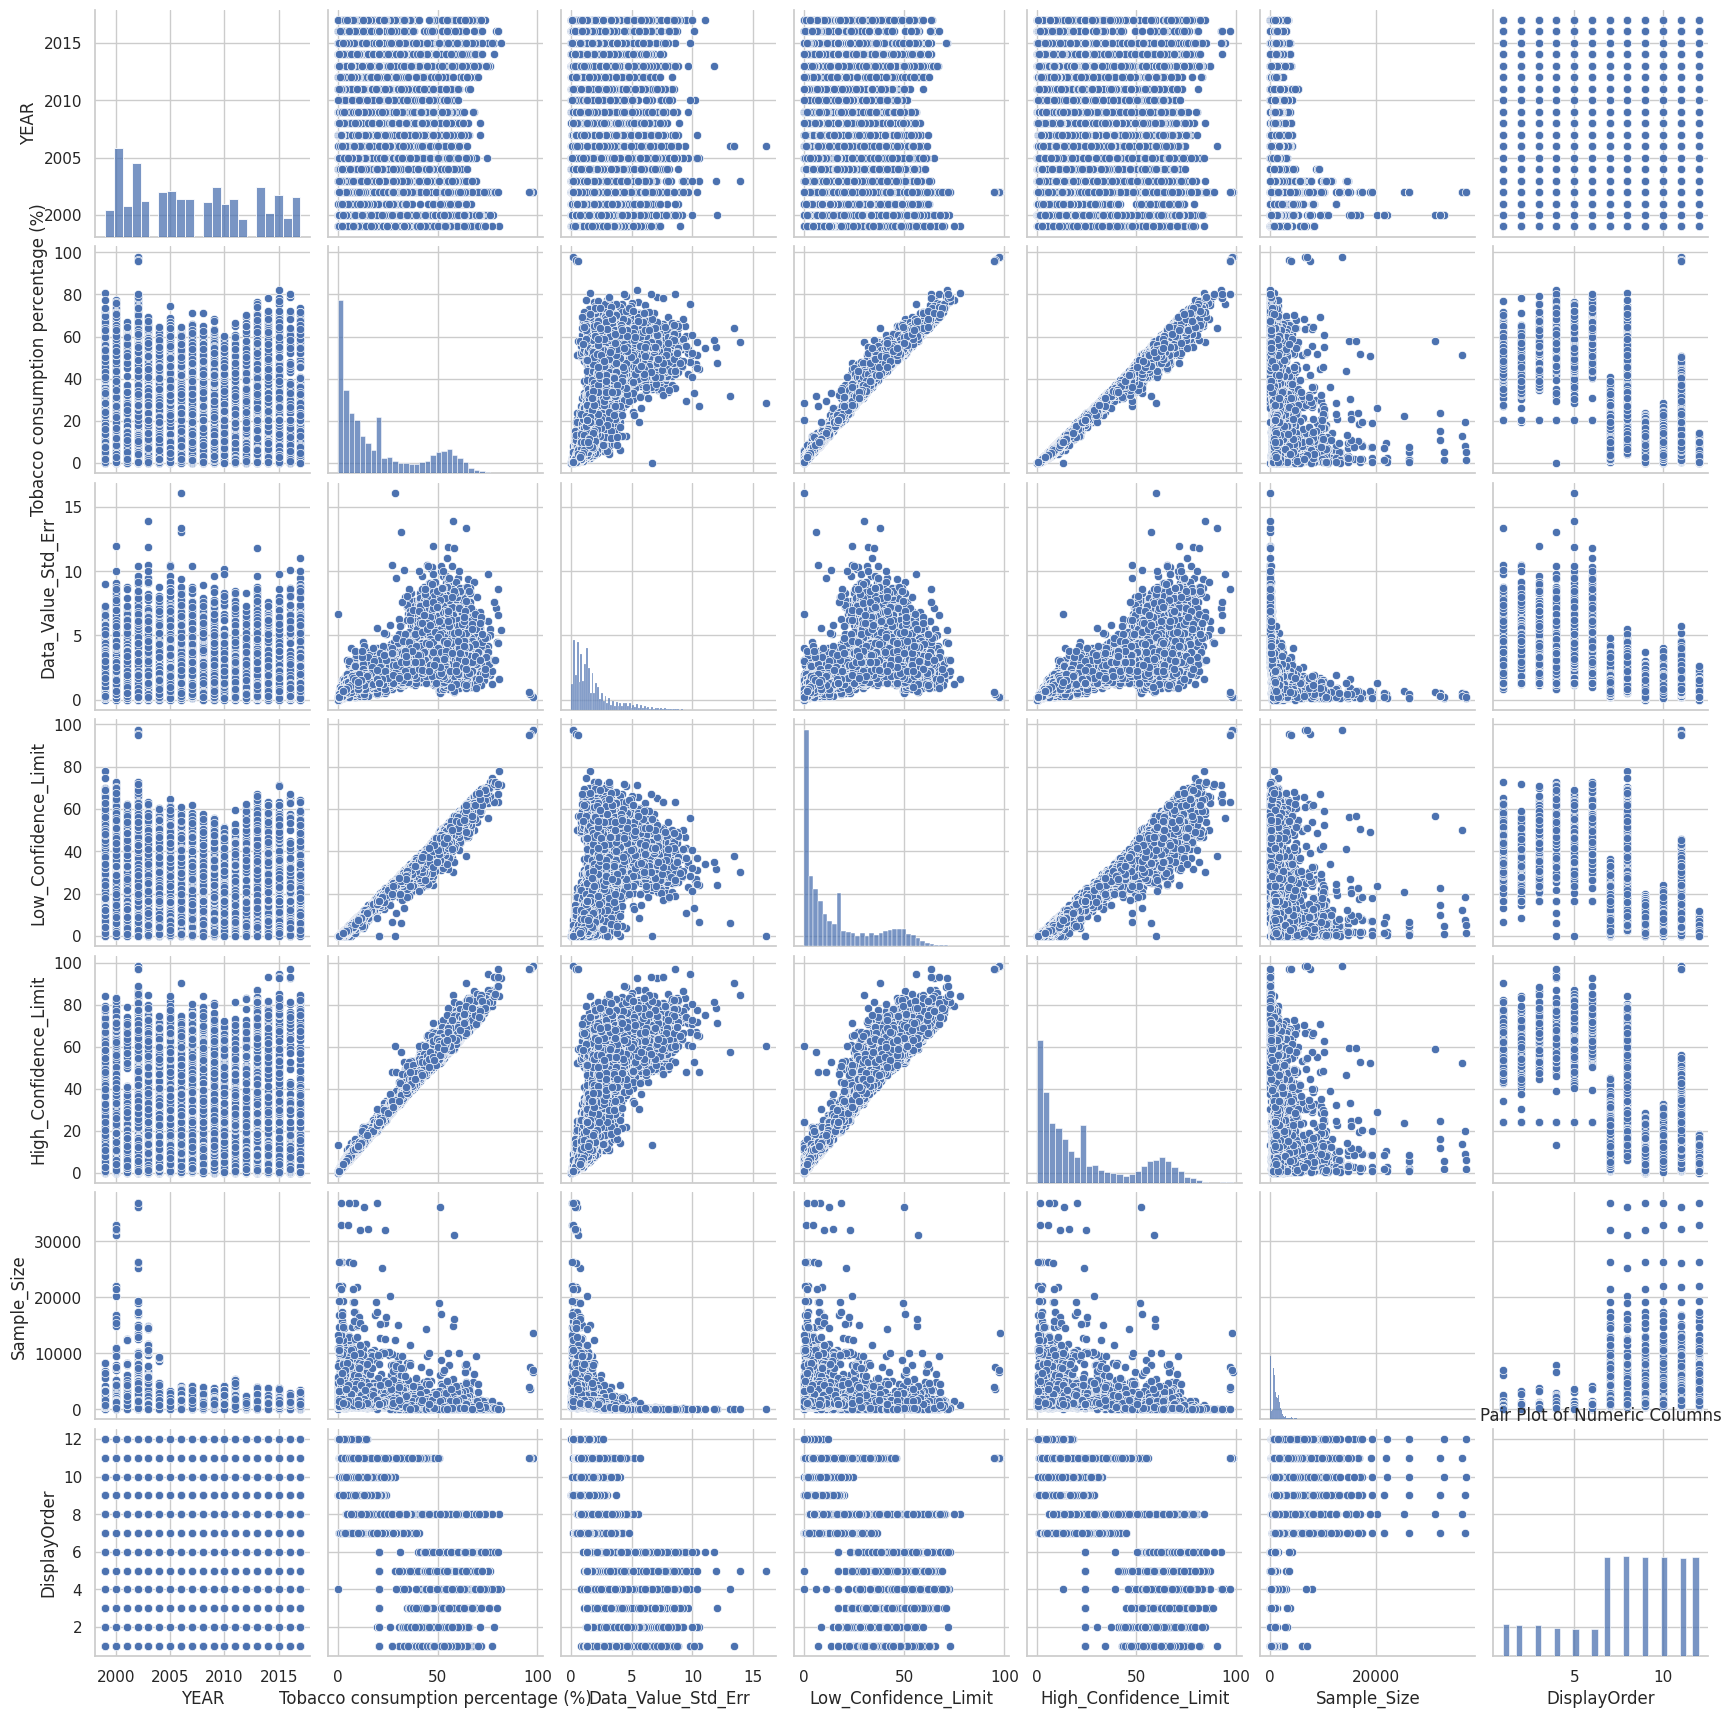

In [ ]:
# Plot 36: Pair plot of numeric columns
plt.figure(figsize=(14, 14))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.title('Pair Plot of Numeric Columns')
plt.show()

*   Relationships between variables: By looking at the scatterplots, we can see if there are any linear or nonlinear relationships between the pairs of variables. For example, the scatterplot between "Low_Confidence_Limit" and "High_Confidence_Limit" might show a positive correlation, indicating that higher lower confidence limits tend to be associated with higher upper confidence limits.
*   Distribution of variables: The diagonal plots are histograms, which show the distribution of each individual numeric variable in your data. For instance, the histogram for "Sample_Size" might show whether the data is skewed towards smaller or larger sample sizes.

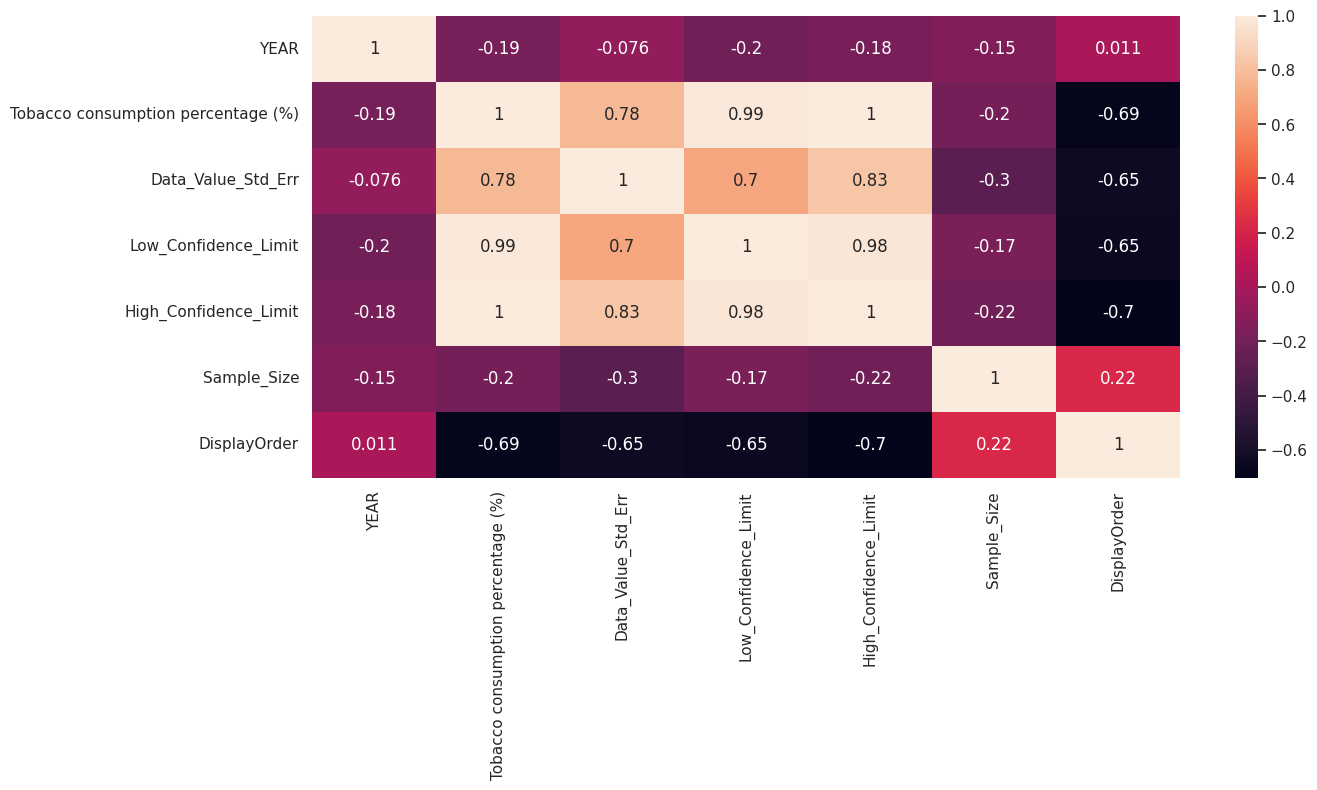

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')
# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

*   Low_Confidence_Limit and High_Confidence_Limit has high correlation. hence will remove

In [ ]:
df.drop(columns=['Low_Confidence_Limit','High_Confidence_Limit'],inplace=True)

In [ ]:
# Finding Multicollinearity
def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
cal_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,YEAR,25.733113
1,Tobacco consumption percentage (%),5.818708
2,Data_Value_Std_Err,5.931560
3,Sample_Size,1.625450
4,DisplayOrder,15.999409


In [ ]:
df.drop(columns=['YEAR'],inplace=True)

In [ ]:
df.head()

,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Tobacco consumption percentage (%),...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,32.2,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,47.8,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,12.7,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,28.5,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,20.5,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


#####TopicType

In [ ]:
df['TopicType'].value_counts()

TopicType
Tobacco Use – Survey Data    10600
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['TopicType'], prefix='TopicType', dtype=int)

#####TopicDesc

In [ ]:
df['TopicDesc'].value_counts()

TopicDesc
Cigarette Use (Youth)            4107
Smokeless Tobacco Use (Youth)    4083
Cessation (Youth)                2410
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['TopicDesc'], prefix='TopicDesc', dtype=int)

#####MeasureDesc

In [ ]:
df['MeasureDesc'].value_counts()

MeasureDesc
Smoking Status                                               4107
User Status                                                  4083
Percent of Current Smokers Who Want to Quit                  1284
Quit Attempt in Past Year Among Current Cigarette Smokers    1126
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['MeasureDesc'], prefix='MeasureDesc', dtype=int)

#####DataSource

In [ ]:
df['DataSource'].value_counts()

DataSource
YTS     10566
NYTS       34
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['DataSource'], prefix='DataSource', dtype=int)

#####Response

In [ ]:
df['Response'].value_counts()

Response
Current     5140
Ever        2730
Frequent    2730
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Response'], prefix='Response', dtype=int)

In [ ]:
df['Data_Value_Unit'].value_counts()

Data_Value_Unit
%    10600
Name: count, dtype: int64

In [ ]:
df.drop(columns=['Data_Value_Unit'], inplace=True)

In [ ]:
df['Data_Value_Type'].value_counts()

Data_Value_Type
Percentage    10600
Name: count, dtype: int64

In [ ]:
df.drop(columns=['Data_Value_Type'], inplace=True)

In [ ]:
df.head()

,LocationAbbr,LocationDesc,Tobacco consumption percentage (%),Data_Value_Std_Err,Sample_Size,Gender,Race,Age,Education,GeoLocation,...,TopicDesc_Smokeless Tobacco Use (Youth),MeasureDesc_Percent of Current Smokers Who Want to Quit,MeasureDesc_Quit Attempt in Past Year Among Current Cigarette Smokers,MeasureDesc_Smoking Status,MeasureDesc_User Status,DataSource_NYTS,DataSource_YTS,Response_Current,Response_Ever,Response_Frequent
0,OH,Ohio,32.2,3.2,1377.0,Overall,All Races,All Ages,Middle School,"(40.060210141, -82.404260056)",...,0,0,0,1,0,0,1,0,1,0
1,AL,Alabama,47.8,2.9,654.0,Female,All Races,All Ages,High School,"(32.840571122, -86.631860762)",...,0,0,0,1,0,0,1,0,1,0
2,WV,West Virginia,12.7,1.9,781.0,Male,All Races,All Ages,High School,"(38.665510202, -80.712640135)",...,1,0,0,0,1,0,1,0,0,1
3,IL,Illinois,28.5,2.2,1323.0,Overall,All Races,All Ages,Middle School,"(40.485010283, -88.997710178)",...,0,0,0,1,0,0,1,0,1,0
4,CT,Connecticut,20.5,2.3,973.0,Male,All Races,All Ages,High School,"(41.56266102, -72.649840952)",...,1,0,0,0,1,0,1,0,1,0


#####Gender

In [ ]:
df['Gender'].value_counts()

Gender
Overall    3556
Female     3522
Male       3522
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

#####Race

In [ ]:
df['Race'].value_counts()

Race
All Races    10600
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Race'], prefix='Race', dtype=int)

#####Age

In [ ]:
df['Age'].value_counts()

Age
All Ages    10600
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Age'], prefix='Age', dtype=int)

#####Education

In [ ]:
df['Education'].value_counts()

Education
Middle School    5633
High School      4967
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Education'], prefix='Education', dtype=int)

In [ ]:
df['GeoLocation'].value_counts()

GeoLocation
(32.745510099, -89.538030825)       651
(32.840571122, -86.631860762)       426
(40.130570048, -74.273691288)       411
(44.393191174, -89.816370742)       408
(41.56266102, -72.649840952)        405
(35.466220975, -79.159250463)       402
(38.665510202, -80.712640135)       378
(47.475319779, -100.118421049)      378
(39.008830667, -75.577741168)       354
(33.998821303, -81.045371207)       348
(35.472031356, -97.521070214)       342
(40.793730152, -77.860700294)       330
(38.635790776, -92.566300053)       318
(21.304850435, -157.857749403)      312
(32.839681093, -83.627580346)       303
(40.060210141, -82.404260056)       303
(31.312660644, -92.445680071)       288
(39.766910452, -86.149960194)       288
(40.485010283, -88.997710178)       282
(42.469400913, -93.816490556)       276
(34.86597028, -111.763811277)       264
(41.641040988001, -99.365720623)    258
(37.645970271, -84.774971048)       255
(44.353130053, -100.373530637)      234
(34.748650124, -92.274490743

In [ ]:
# Drop the original 'GeoLocation' column
df = df.drop(columns=['GeoLocation'])

In [ ]:
# List of columns to drop
columns_to_drop = [
    'LocationAbbr',
    'LocationDesc',
    'TopicTypeId',
    'TopicId',
    'MeasureId',
    'StratificationID1',
    'StratificationID2',
    'StratificationID3',
    'StratificationID4',
    'SubMeasureID',
    'DisplayOrder'
]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 23 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Tobacco consumption percentage (%)                                     10600 non-null  float64
 1   Data_Value_Std_Err                                                     10600 non-null  float64
 2   Sample_Size                                                            10600 non-null  float64
 3   TopicType_Tobacco Use – Survey Data                                    10600 non-null  int64  
 4   TopicDesc_Cessation (Youth)                                            10600 non-null  int64  
 5   TopicDesc_Cigarette Use (Youth)                                        10600 non-null  int64  
 6   TopicDesc_Smokeless Tobacco Use (Youth)                                10600 non-null 

In [ ]:
df.head()

,Tobacco consumption percentage (%),Data_Value_Std_Err,Sample_Size,TopicType_Tobacco Use – Survey Data,TopicDesc_Cessation (Youth),TopicDesc_Cigarette Use (Youth),TopicDesc_Smokeless Tobacco Use (Youth),MeasureDesc_Percent of Current Smokers Who Want to Quit,MeasureDesc_Quit Attempt in Past Year Among Current Cigarette Smokers,MeasureDesc_Smoking Status,...,Response_Current,Response_Ever,Response_Frequent,Gender_Female,Gender_Male,Gender_Overall,Race_All Races,Age_All Ages,Education_High School,Education_Middle School
0,32.2,3.2,1377.0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,1,1,0,1
1,47.8,2.9,654.0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,1,1,1,0
2,12.7,1.9,781.0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,1,1,0
3,28.5,2.2,1323.0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,1,1,0,1
4,20.5,2.3,973.0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,1,1,1,0


In [ ]:
df.columns

Index(['Tobacco consumption percentage (%)', 'Data_Value_Std_Err',
       'Sample_Size', 'TopicType_Tobacco Use – Survey Data',
       'TopicDesc_Cessation (Youth)', 'TopicDesc_Cigarette Use (Youth)',
       'TopicDesc_Smokeless Tobacco Use (Youth)',
       'MeasureDesc_Percent of Current Smokers Who Want to Quit',
       'MeasureDesc_Quit Attempt in Past Year Among Current Cigarette Smokers',
       'MeasureDesc_Smoking Status', 'MeasureDesc_User Status',
       'DataSource_NYTS', 'DataSource_YTS', 'Response_Current',
       'Response_Ever', 'Response_Frequent', 'Gender_Female', 'Gender_Male',
       'Gender_Overall', 'Race_All Races', 'Age_All Ages',
       'Education_High School', 'Education_Middle School'],
      dtype='object')

In [ ]:
X = df.drop(['Tobacco consumption percentage (%)'], axis=1)

In [ ]:
y = df['Tobacco consumption percentage (%)']

In [ ]:
y.head()

0    32.2
1    47.8
2    12.7
3    28.5
4    20.5
Name: Tobacco consumption percentage (%), dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#Multiple linear regression is fitted to the training set.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#checking the score
print("The train score is :", round(regressor.score(X_train, y_train),2))
print("The test score is :", round(regressor.score(X_test, y_test),2))

The train score is : 0.8
The test score is : 0.8


In [ ]:
y_pred_train_linear=regressor.predict(X_train)
y_pred_test_linear=regressor.predict(X_test)

In [ ]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_linear_train= mean_squared_error(y_train, y_pred_train_linear)
print("MSE :",MSE_linear_train)

#calculate RMSE
RMSE_linear_train=np.sqrt(MSE_linear_train)
print("RMSE :",RMSE_linear_train)

#calculate MAE
MAE_linear_train= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_linear_train)

#calculate r2 and adjusted r2
R2_linear_train= r2_score(y_train, y_pred_train_linear)
print("R2 :",R2_linear_train)
Adjusted_R2_linear_train = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_linear_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_linear_test= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_linear_test)

#calculate RMSE
RMSE_linear_test=np.sqrt(MSE_linear_test)
print("RMSE :",RMSE_linear_test)

#calculate MAE
MAE_linear_test= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_linear_test)

#calculate r2 and adjusted r2
R2_linear_test= r2_score(y_test, y_pred_test_linear)
print("R2 :",R2_linear_test)
Adjusted_R2_linear_test = (1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_linear_test)

Evaluation metrics for training data

MSE : 84.49338662095208
RMSE : 9.192028427988681
MAE : 6.717341995319721
R2 : 0.8017139110590082
Adjusted R2 : 0.7996336564301567
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 86.04795409196078
RMSE : 9.276203646533466
MAE : 6.78290529135952
R2 : 0.7979523891747055
Adjusted R2 : 0.7958326717506918


Based on the evaluation metrics for both training and testing data, here are some insights:

1. **Mean Squared Error (MSE)**:
   - Training Data: MSE of approximately 84.49
   - Testing Data: MSE of approximately 86.05
   - The MSE represents the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance.

2. **Root Mean Squared Error (RMSE)**:
   - Training Data: RMSE of approximately 9.19
   - Testing Data: RMSE of approximately 9.28
   - RMSE is the square root of MSE and provides the average magnitude of errors in the predicted values. Lower RMSE values indicate better model performance.

3. **Mean Absolute Error (MAE)**:
   - Training Data: MAE of approximately 6.72
   - Testing Data: MAE of approximately 6.78
   - MAE represents the average absolute difference between the predicted values and the actual values. Lower MAE values indicate better model performance.

4. **R-squared (R2)**:
   - Training Data: R2 of approximately 0.80
   - Testing Data: R2 of approximately 0.80
   - R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values of R2 (closer to 1) indicate better fit of the model to the data.

5. **Adjusted R-squared**:
   - Training Data: Adjusted R2 of approximately 0.80
   - Testing Data: Adjusted R2 of approximately 0.80
   - Adjusted R2 takes into account the number of predictors in the model and provides a more accurate measure of model fit, especially for multiple regression. Higher values of adjusted R2 indicate better model fit.

Overall, the linear regression model appears to perform reasonably well, with similar performance on both training and testing data. However, it's essential to consider additional factors such as the specific context of the problem, the business objectives, and potential areas for model improvement.

In [ ]:
# Create an SVM regressor with a radial basis function (RBF) kernel
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [ ]:
# Fit the SVM regressor to the training data
svm_regressor.fit(X_train, y_train)

SVR()

In [ ]:
# Make predictions on the training set
y_pred_train_svm = svm_regressor.predict(X_train)

In [ ]:
# Make predictions on the test set
y_pred_test_svm = svm_regressor.predict(X_test)

In [ ]:
# Evaluate the performance on training data
print('Evaluation metrics for training data\n')
MSE_svm_train = mean_squared_error(y_train, y_pred_train_svm)
print("MSE:", MSE_svm_train)

RMSE_svm_train = np.sqrt(MSE_svm_train)
print("RMSE:", RMSE_svm_train)

MAE_svm_train = mean_absolute_error(y_train, y_pred_train_svm)
print("MAE:", MAE_svm_train)

R2_svm_train = r2_score(y_train, y_pred_train_svm)
print("R2:", R2_svm_train)

Adjusted_R2_svm_train = (1 - (1 - r2_score(y_train, y_pred_train_svm)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted R2:", Adjusted_R2_svm_train)

print('--' * 80)

# Evaluate the performance on testing data
print('Evaluation metrics for testing data\n')
MSE_svm_test = mean_squared_error(y_test, y_pred_test_svm)
print("MSE:", MSE_svm_test)

RMSE_svm_test = np.sqrt(MSE_svm_test)
print("RMSE:", RMSE_svm_test)

MAE_svm_test = mean_absolute_error(y_test, y_pred_test_svm)
print("MAE:", MAE_svm_test)

R2_svm_test = r2_score(y_test, y_pred_test_svm)
print("R2:", R2_svm_test)

Adjusted_R2_svm_test = (1 - (1 - r2_score(y_test, y_pred_test_svm)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)))
print("Adjusted R2:", Adjusted_R2_svm_test)

Evaluation metrics for training data

MSE: 257.3594455190994
RMSE: 16.042426422430598
MAE: 11.803716977373703
R2: 0.3960379629125884
Adjusted R2: 0.3944668189116515
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE: 263.864172382933
RMSE: 16.24389646553231
MAE: 12.052249264915632
R2: 0.380425413073869
Adjusted R2: 0.3739253458767423


Based on the evaluation metrics for both training and testing data using Support Vector Machine (SVM) regression, here are some insights:

1. **Mean Squared Error (MSE)**:
   - Training Data: MSE of approximately 257.36
   - Testing Data: MSE of approximately 263.86
   - The MSE represents the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance.

2. **Root Mean Squared Error (RMSE)**:
   - Training Data: RMSE of approximately 16.04
   - Testing Data: RMSE of approximately 16.24
   - RMSE is the square root of MSE and provides the average magnitude of errors in the predicted values. Lower RMSE values indicate better model performance.

3. **Mean Absolute Error (MAE)**:
   - Training Data: MAE of approximately 11.80
   - Testing Data: MAE of approximately 12.05
   - MAE represents the average absolute difference between the predicted values and the actual values. Lower MAE values indicate better model performance.

4. **R-squared (R2)**:
   - Training Data: R2 of approximately 0.40
   - Testing Data: R2 of approximately 0.38
   - R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values of R2 (closer to 1) indicate better fit of the model to the data.

5. **Adjusted R-squared**:
   - Training Data: Adjusted R2 of approximately 0.39
   - Testing Data: Adjusted R2 of approximately 0.37
   - Adjusted R2 takes into account the number of predictors in the model and provides a more accurate measure of model fit, especially for multiple regression. Higher values of adjusted R2 indicate better model fit.

Overall, the SVM regression model shows moderate performance, with higher errors compared to linear regression. However, the R2 values indicate that the model explains approximately 38-40% of the variance in the target variable. Further analysis and potential model improvements may be necessary to enhance performance.

###**Summary:**

The Youth Tobacco Survey dataset provides comprehensive insights into various aspects of tobacco use among young individuals, encompassing smoking, experimentation, frequency of use, cessation behavior, exposure to secondhand smoke, and sources of obtaining tobacco products. Through analysis of this dataset, we explored the prevalence and determinants of youth tobacco use, identified trends in tobacco consumption patterns, and evaluated the effectiveness of tobacco control policies. We employed various statistical techniques, including descriptive analysis, visualization, linear regression, and support vector machine (SVM) regression, to understand the data and develop predictive models.

Certainly! Here are more detailed insights from the analysis, presented in a point-wise format:

1. **Demographic Distribution:**
   - The dataset provides comprehensive information on various demographic factors such as gender, age, race, and education level.
   - Analysis reveals the distribution of these demographic variables across different measures of tobacco use, allowing for a deeper understanding of how tobacco consumption patterns vary among different demographic groups.

2. **Tobacco Consumption Trends Over Time:**
   - Examination of the dataset reveals trends in tobacco consumption prevalence over time, spanning multiple years.
   - By analyzing the temporal patterns, it becomes evident whether tobacco use among young individuals is increasing, decreasing, or remaining stable over the years.

3. **Associations Between Demographic Variables and Tobacco Use:**
   - Through statistical analysis, correlations between demographic variables (e.g., gender, age, education) and tobacco consumption behaviors can be identified.
   - Insights into which demographic groups are more susceptible to tobacco use, as well as the factors influencing their consumption patterns, can be derived.

4. **Impact of Tobacco Control Policies:**
   - The dataset can be used to assess the effectiveness of tobacco control policies implemented over time.
   - By comparing tobacco consumption rates before and after the implementation of specific policies, policymakers can gauge the impact of regulatory measures on reducing tobacco use among young individuals.

5. **Prevalence of Smoking Cessation Behaviors:**
   - Analysis of the dataset provides insights into smoking cessation behaviors among young individuals, including quit attempts, use of cessation aids, and success rates.
   - Understanding the prevalence of smoking cessation behaviors helps in identifying areas for targeted intervention and support services for individuals trying to quit smoking.

6. **Exposure to Secondhand Smoke:**
   - The dataset includes information on exposure to secondhand smoke among young individuals in various settings such as homes, schools, and public spaces.
   - Insights into the prevalence of secondhand smoke exposure highlight the need for policies and interventions aimed at reducing involuntary exposure to tobacco smoke.

7. **Sources of Tobacco Products:**
   - Examination of the dataset reveals sources from which young individuals obtain tobacco products, including retail outlets, social networks, and online platforms.
   - Identifying the primary sources of tobacco products helps in developing strategies to restrict access and availability, especially among underage individuals.

8. **Socioeconomic Disparities in Tobacco Use:**
   - Analysis of tobacco consumption patterns across different socioeconomic strata highlights disparities in tobacco use prevalence.
   - Understanding the socioeconomic determinants of tobacco use allows for targeted interventions aimed at addressing disparities and promoting health equity.

9. **Predictive Modeling and Forecasting:**
   - Utilizing predictive modeling techniques such as linear regression and support vector machine (SVM) regression enables forecasting of tobacco consumption trends.
   - These models can provide insights into future tobacco use prevalence and assist in developing proactive strategies for tobacco control and prevention.

10. **Evaluation of Intervention Programs:**
    - The dataset can be used to evaluate the effectiveness of intervention programs and public health campaigns aimed at reducing tobacco use among young individuals.
    - By assessing changes in tobacco consumption rates following the implementation of intervention programs, policymakers can determine the efficacy of these initiatives and make data-driven decisions for future interventions.

In conclusion, the Youth Tobacco Survey dataset offers rich insights into the prevalence, determinants, and trends of tobacco use among young individuals. Through comprehensive analysis and interpretation of this data, stakeholders can develop evidence-based strategies to combat youth tobacco use, promote smoking cessation, and improve public health outcomes.